#PART-1

In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt
import IPython.display as ipd

In [ ]:
# Function to read and normalize audio file
def read_audio(filename):
    sample_rate, data = wavfile.read(filename)
    if data.dtype == np.int16:
        data = data.astype(np.float32) / 32768.0
    return sample_rate, data

In [ ]:
# Read audio files
sample_rate1, music1 = read_audio('/content/music1.wav')
sample_rate2, music2 = read_audio('/content/music2.wav')

In [ ]:
# Play original files
print("Playing music1.wav:")
ipd.display(ipd.Audio(music1, rate=sample_rate1))



Playing music1.wav:


In [ ]:
print("Playing music2.wav:")
ipd.display(ipd.Audio(music2, rate=sample_rate2))


Playing music2.wav:


In [ ]:

# Convert to frequency domain
freq_domain1 = fft(music1)
freq_domain2 = fft(music2)

# Frequency shift music1
shift_amount = 1000  # Shift by 1000 Hz
n = len(freq_domain1)
freq_shift = np.exp(2j * np.pi * shift_amount * np.arange(n) / sample_rate1)
shifted_freq_domain1 = freq_domain1 * freq_shift

# Convert back to time domain
shifted_time_domain1 = np.real(ifft(shifted_freq_domain1))

# Normalize the shifted signal
shifted_time_domain1 = shifted_time_domain1 / np.max(np.abs(shifted_time_domain1))


In [ ]:

# Play the shifted signal
print("Playing frequency-shifted music1.wav:")
ipd.display(ipd.Audio(shifted_time_domain1, rate=sample_rate1))


Playing frequency-shifted music1.wav:


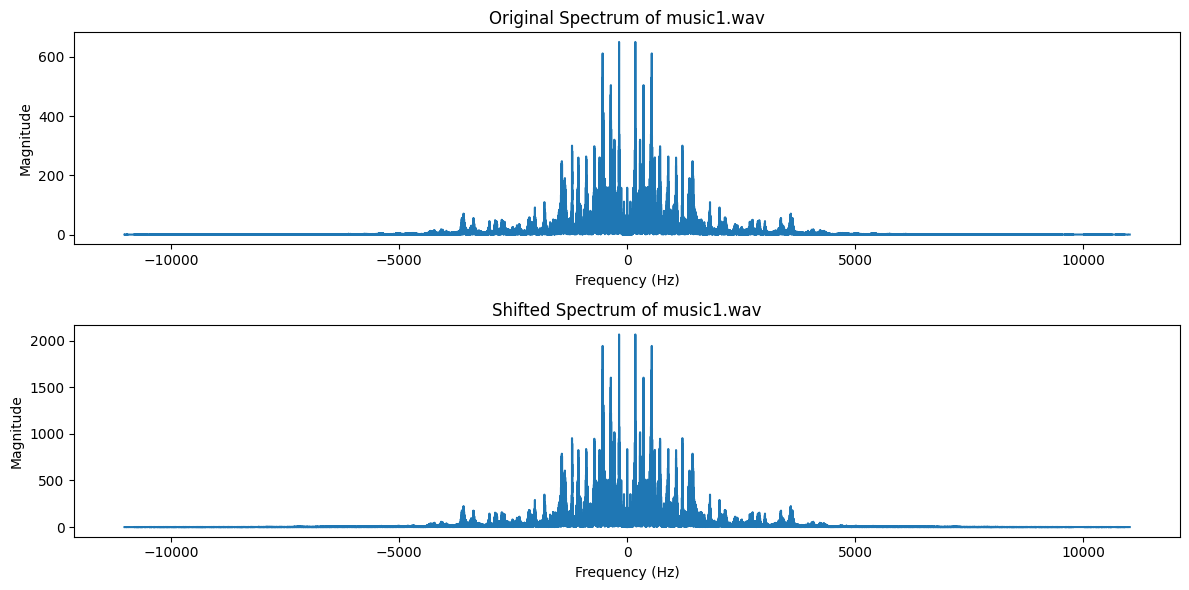

In [ ]:

# Plot original and shifted spectra for comparison
def plot_spectrum(signal, sample_rate, title):
    spectrum = np.abs(fftshift(fft(signal)))
    freqs = np.linspace(-sample_rate/2, sample_rate/2, len(spectrum))
    plt.plot(freqs, spectrum)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_spectrum(music1, sample_rate1, 'Original Spectrum of music1.wav')
plt.subplot(2, 1, 2)
plot_spectrum(shifted_time_domain1, sample_rate1, 'Shifted Spectrum of music1.wav')
plt.tight_layout()
plt.show()

lets try with 3000

In [ ]:

# Convert to frequency domain
freq_domain1 = fft(music1)
freq_domain2 = fft(music2)

# Frequency shift music1
shift_amount = 3000  # Shift by 3000 Hz
n = len(freq_domain1)
freq_shift = np.exp(2j * np.pi * shift_amount * np.arange(n) / sample_rate1)
shifted_freq_domain1 = freq_domain1 * freq_shift

# Convert back to time domain
shifted_time_domain1 = np.real(ifft(shifted_freq_domain1))

# Normalize the shifted signal
shifted_time_domain1 = shifted_time_domain1 / np.max(np.abs(shifted_time_domain1))


In [ ]:

# Play the shifted signal
print("Playing frequency-shifted music1.wav:")
ipd.display(ipd.Audio(shifted_time_domain1, rate=sample_rate1))


Playing frequency-shifted music1.wav:


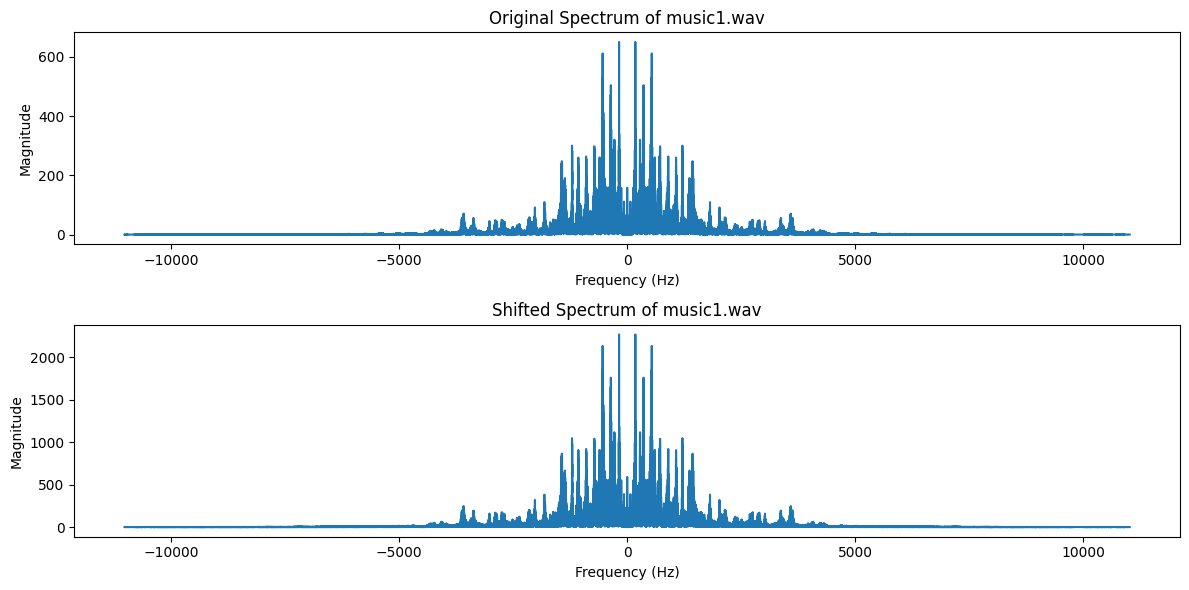

In [ ]:

# Plot original and shifted spectra for comparison
def plot_spectrum(signal, sample_rate, title):
    spectrum = np.abs(fftshift(fft(signal)))
    freqs = np.linspace(-sample_rate/2, sample_rate/2, len(spectrum))
    plt.plot(freqs, spectrum)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_spectrum(music1, sample_rate1, 'Original Spectrum of music1.wav')
plt.subplot(2, 1, 2)
plot_spectrum(shifted_time_domain1, sample_rate1, 'Shifted Spectrum of music1.wav')
plt.tight_layout()
plt.show()

We can see the frequency spectrums is slightly changed and we dont hear the first word after this shifting. if we do a more drastic freq shift, lets see what happes?

In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.fftpack import fft, ifft, fftshift, ifftshift
import matplotlib.pyplot as plt
import IPython.display as ipd

In [ ]:
def read_audio(filename):
    sample_rate, data = wavfile.read(filename)
    if data.dtype == np.int16:
        data = data.astype(np.float32) / 32768.0
    return sample_rate, data

# Read audio files
sample_rate1, music1 = read_audio('music1.wav')
sample_rate2, music2 = read_audio('music2.wav')

# Play original file
print("Playing original music1.wav:")
ipd.display(ipd.Audio(music1, rate=sample_rate1))

# Convert to frequency domain
freq_domain1 = fftshift(fft(music1))

Playing original music1.wav:


Playing frequency-shifted music1.wav:


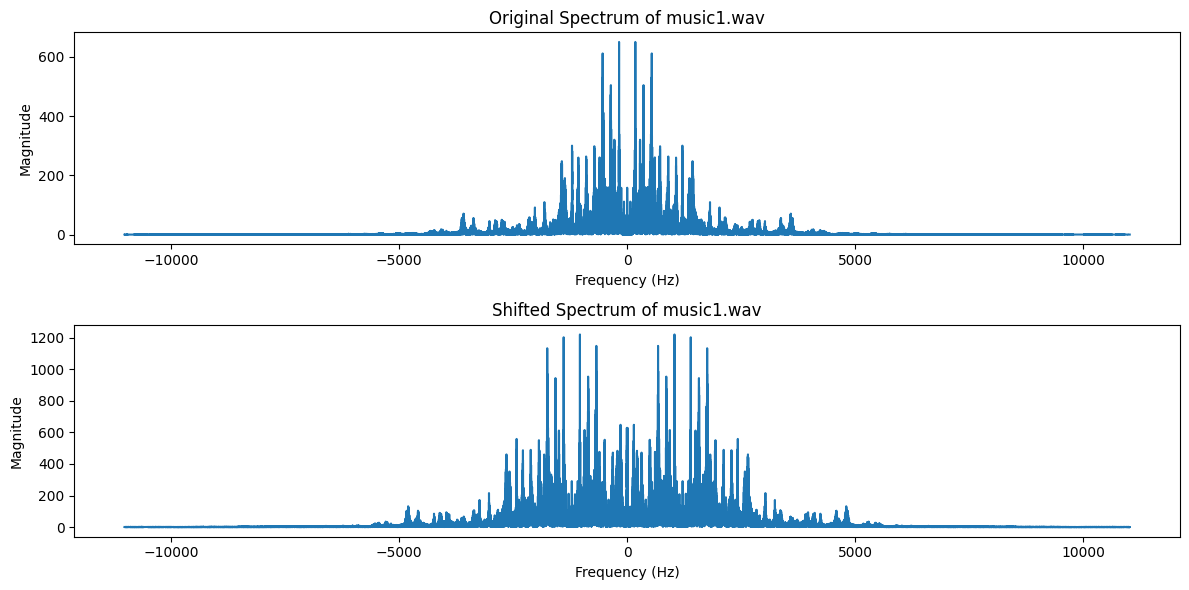

In [ ]:

# Perform a more dramatic frequency shift
shift_amount = sample_rate1 // 2  # Shift by half the sample rate
n = len(freq_domain1)
shifted_freq_domain1 = np.zeros_like(freq_domain1)
shifted_freq_domain1[shift_amount:] = freq_domain1[:n-shift_amount]
shifted_freq_domain1[:shift_amount] = freq_domain1[n-shift_amount:]

# Convert back to time domain
shifted_time_domain1 = np.real(ifft(ifftshift(shifted_freq_domain1)))

# Normalize the shifted signal
shifted_time_domain1 = shifted_time_domain1 / np.max(np.abs(shifted_time_domain1))

# Play the shifted signal
print("Playing frequency-shifted music1.wav:")
ipd.display(ipd.Audio(shifted_time_domain1, rate=sample_rate1))

# Plot original and shifted spectra for comparison
def plot_spectrum(signal, sample_rate, title):
    spectrum = np.abs(fftshift(fft(signal)))
    freqs = np.linspace(-sample_rate/2, sample_rate/2, len(spectrum))
    plt.plot(freqs, spectrum)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_spectrum(music1, sample_rate1, 'Original Spectrum of music1.wav')
plt.subplot(2, 1, 2)
plot_spectrum(shifted_time_domain1, sample_rate1, 'Shifted Spectrum of music1.wav')
plt.tight_layout()
plt.show()

Now its unclear! here is how this drastic shifting changes the voice. This approach should result in a signal that doesn't sound clear when played back. Here's why:

The shift is large enough to move most of the audible frequencies into inaudible ranges.
Low frequencies are moved to high frequencies and vice versa, completely disrupting the structure of the sound.
The harmonic relationships in the original sound are completely destroyed.

When we play this shifted signal, we should hear noise or highly distorted sound, not recognizable as the original audio.

we can make it more drastic if we do this as well:


Playing frequency-shifted music1.wav:


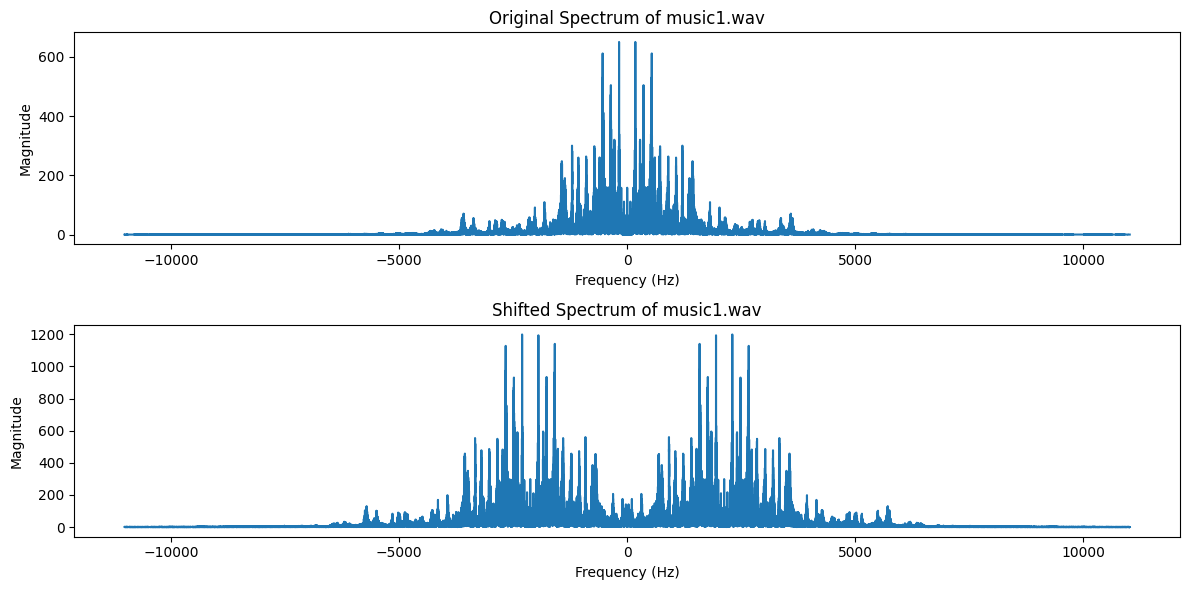

In [ ]:

# Perform a more dramatic frequency shift
shift_amount = (7 * sample_rate1) // 8  # Shift by 7/8 the sample rate
n = len(freq_domain1)
shifted_freq_domain1 = np.zeros_like(freq_domain1)
shifted_freq_domain1[shift_amount:] = freq_domain1[:n-shift_amount]
shifted_freq_domain1[:shift_amount] = freq_domain1[n-shift_amount:]

# Convert back to time domain
shifted_time_domain1 = np.real(ifft(ifftshift(shifted_freq_domain1)))

# Normalize the shifted signal
shifted_time_domain1 = shifted_time_domain1 / np.max(np.abs(shifted_time_domain1))

# Play the shifted signal
print("Playing frequency-shifted music1.wav:")
ipd.display(ipd.Audio(shifted_time_domain1, rate=sample_rate1))

# Plot original and shifted spectra for comparison
def plot_spectrum(signal, sample_rate, title):
    spectrum = np.abs(fftshift(fft(signal)))
    freqs = np.linspace(-sample_rate/2, sample_rate/2, len(spectrum))
    plt.plot(freqs, spectrum)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_spectrum(music1, sample_rate1, 'Original Spectrum of music1.wav')
plt.subplot(2, 1, 2)
plot_spectrum(shifted_time_domain1, sample_rate1, 'Shifted Spectrum of music1.wav')
plt.tight_layout()
plt.show()

Playing frequency-shifted music1.wav:


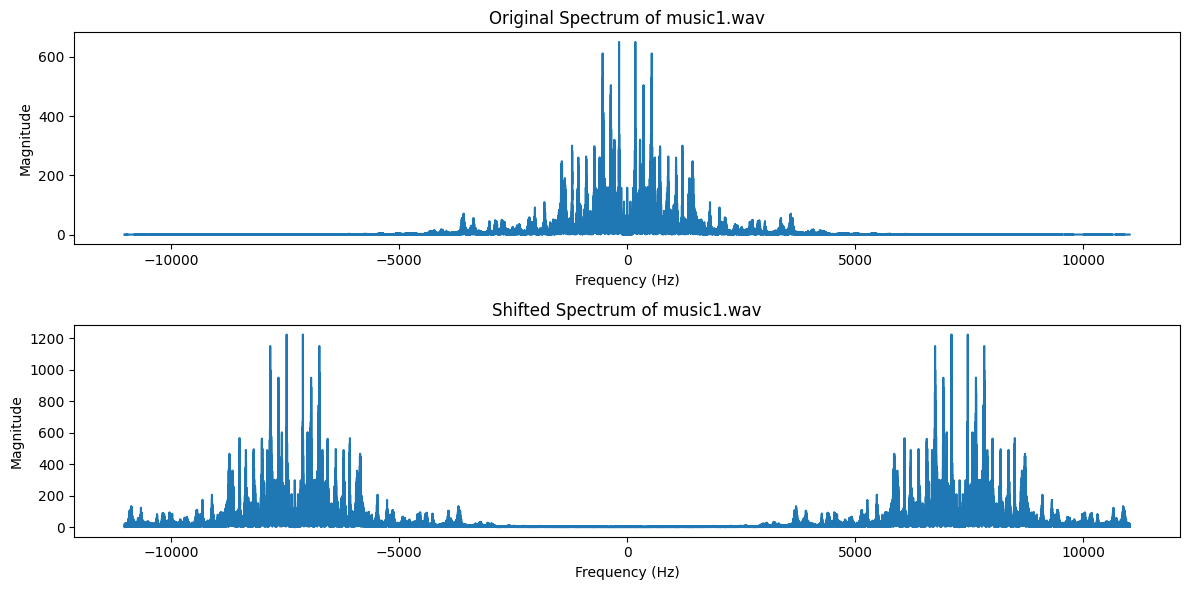

In [ ]:

# Perform a more dramatic frequency shift
shift_amount = (3 * sample_rate1)   # Shift by 3 times the sample rate
n = len(freq_domain1)
shifted_freq_domain1 = np.zeros_like(freq_domain1)
shifted_freq_domain1[shift_amount:] = freq_domain1[:n-shift_amount]
shifted_freq_domain1[:shift_amount] = freq_domain1[n-shift_amount:]

# Convert back to time domain
shifted_time_domain1 = np.real(ifft(ifftshift(shifted_freq_domain1)))

# Normalize the shifted signal
shifted_time_domain1 = shifted_time_domain1 / np.max(np.abs(shifted_time_domain1))

# Play the shifted signal
print("Playing frequency-shifted music1.wav:")
ipd.display(ipd.Audio(shifted_time_domain1, rate=sample_rate1))

# Plot original and shifted spectra for comparison
def plot_spectrum(signal, sample_rate, title):
    spectrum = np.abs(fftshift(fft(signal)))
    freqs = np.linspace(-sample_rate/2, sample_rate/2, len(spectrum))
    plt.plot(freqs, spectrum)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_spectrum(music1, sample_rate1, 'Original Spectrum of music1.wav')
plt.subplot(2, 1, 2)
plot_spectrum(shifted_time_domain1, sample_rate1, 'Shifted Spectrum of music1.wav')
plt.tight_layout()
plt.show()

now this is super unclear.
The sound is unclear after frequency shifting for several key reasons:

Harmonic disruption: Frequency shifting alters the fundamental relationships between harmonics in the audio, destroying the natural harmonic structure

Frequency range alteration: Some frequencies are shifted outside the range of human hearing, while others are moved into this range, changing what we can perceive.

Spectral inversion: Parts of the spectrum may be inverted, further distorting the original sound characteristics.

Phase relationships: The shifting process can alter phase relationships between different frequency components, affecting how we perceive the overall sound.

Loss of formant structure: For speech or vocal music, frequency shifting disrupts the formant structure crucial for recognition and clarity.

These factors combined result in a sound that lacks the coherent structure and familiar patterns our brains are used to processing, making it difficult to interpret and unclear.

Playing frequency-shifted music1.wav:


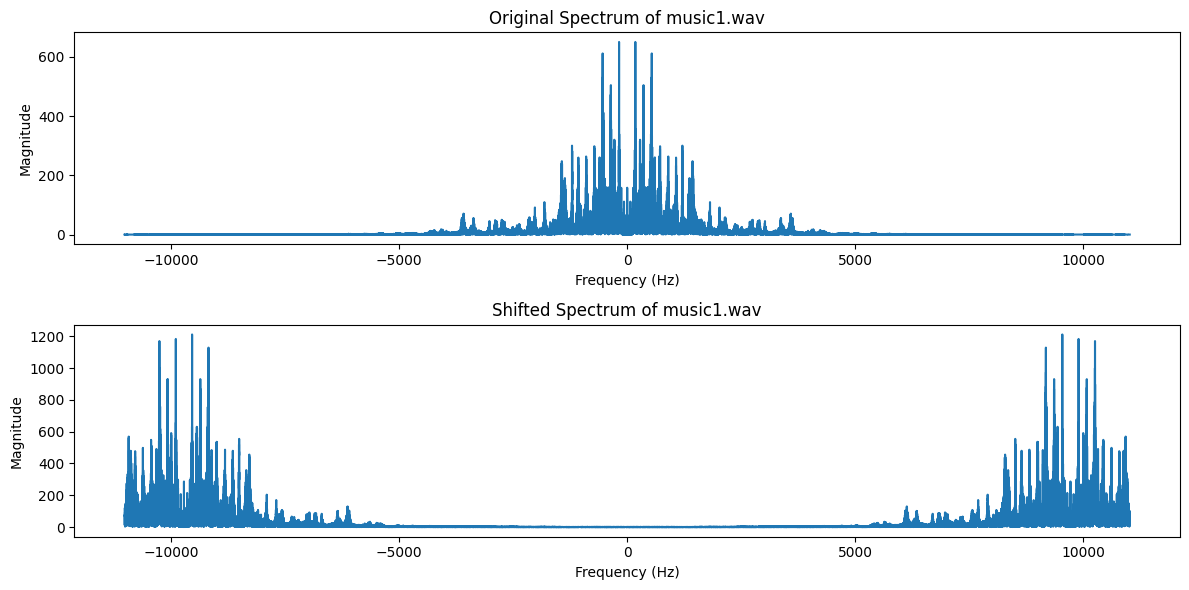

Playing combined signal:


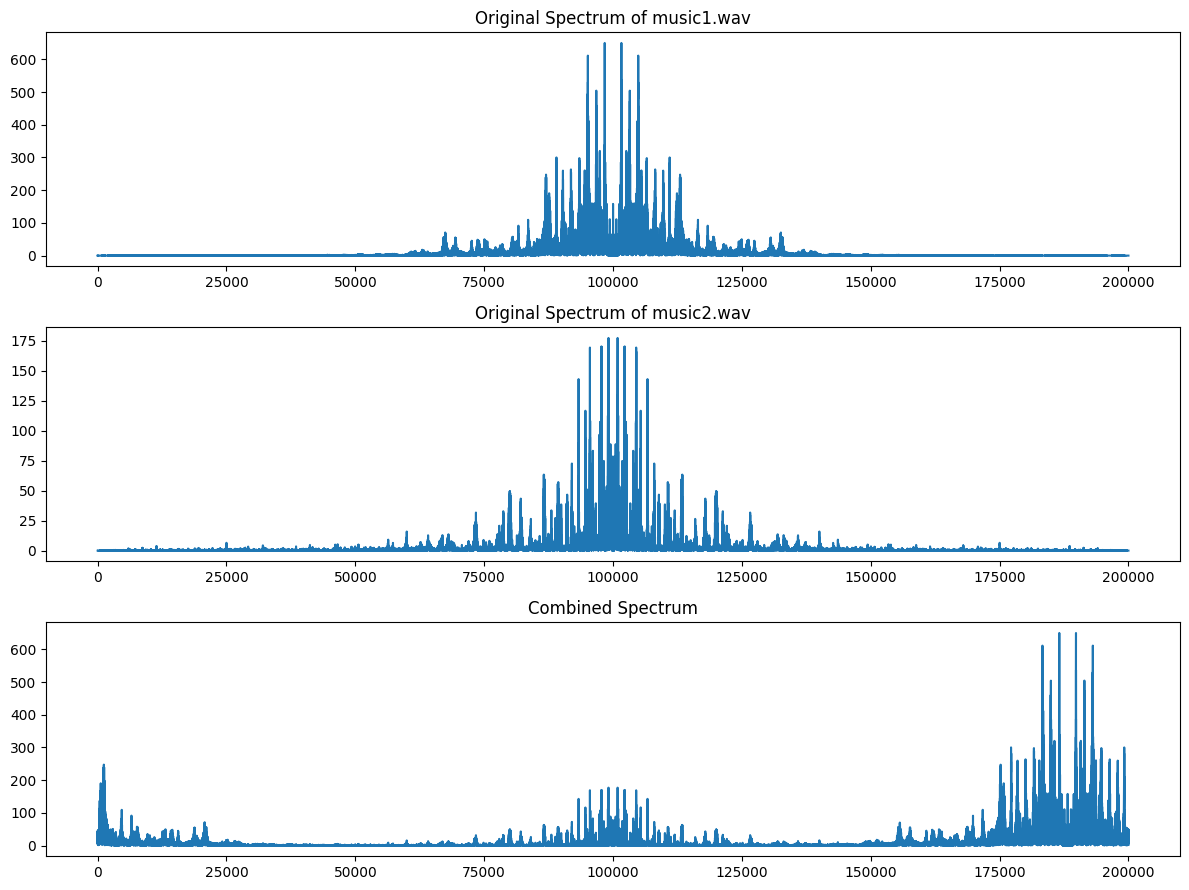

In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.fftpack import fft, ifft, fftshift, ifftshift
import matplotlib.pyplot as plt
import IPython.display as ipd

def read_audio(filename):
    sample_rate, data = wavfile.read(filename)
    if data.dtype == np.int16:
        data = data.astype(np.float32) / 32768.0
    return sample_rate, data

sample_rate1, music1 = read_audio('music1.wav')
sample_rate2, music2 = read_audio('music2.wav')

# Ensure both audio files have the same length
min_length = min(len(music1), len(music2))
music1 = music1[:min_length]
music2 = music2[:min_length]

# Convert to frequency domain
freq_domain1 = fftshift(fft(music1))
freq_domain2 = fftshift(fft(music2))


# Perform a more dramatic frequency shift
shift_amount = (4 * sample_rate1)   # Shift by 4* the sample rate
n = len(freq_domain1)
shifted_freq_domain1 = np.zeros_like(freq_domain1)
shifted_freq_domain1[shift_amount:] = freq_domain1[:n-shift_amount]
shifted_freq_domain1[:shift_amount] = freq_domain1[n-shift_amount:]

# Convert back to time domain
shifted_time_domain1 = np.real(ifft(ifftshift(shifted_freq_domain1)))

# Normalize the shifted signal
shifted_time_domain1 = shifted_time_domain1 / np.max(np.abs(shifted_time_domain1))

# Play the shifted signal
print("Playing frequency-shifted music1.wav:")
ipd.display(ipd.Audio(shifted_time_domain1, rate=sample_rate1))

# Plot original and shifted spectra for comparison
def plot_spectrum(signal, sample_rate, title):
    spectrum = np.abs(fftshift(fft(signal)))
    freqs = np.linspace(-sample_rate/2, sample_rate/2, len(spectrum))
    plt.plot(freqs, spectrum)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_spectrum(music1, sample_rate1, 'Original Spectrum of music1.wav')
plt.subplot(2, 1, 2)
plot_spectrum(shifted_time_domain1, sample_rate1, 'Shifted Spectrum of music1.wav')
plt.tight_layout()
plt.show()

# Add the shifted frequency information of music1 with frequency information of music2
combined_freq_domain = shifted_freq_domain1 + freq_domain2

# Convert back to time domain
combined_time_domain = np.real(ifft(ifftshift(combined_freq_domain)))

# Normalize the combined signal
combined_time_domain = combined_time_domain / np.max(np.abs(combined_time_domain))

# Play the combined signal
print("Playing combined signal:")
ipd.display(ipd.Audio(combined_time_domain, rate=sample_rate1))

# Plot spectra for comparison
plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(np.abs(freq_domain1))
plt.title('Original Spectrum of music1.wav')
plt.subplot(3, 1, 2)
plt.plot(np.abs(freq_domain2))
plt.title('Original Spectrum of music2.wav')
plt.subplot(3, 1, 3)
plt.plot(np.abs(combined_freq_domain))
plt.title('Combined Spectrum')
plt.tight_layout()
plt.show()

When I play the combined signal, I will primarily hear music2. Here's why:

The frequency content of music1 has been significantly shifted and distorted. Most of its original frequency components have been moved out of the typical audible range or inverted.

The frequency content of music2 remains unchanged and in its original position in the spectrum.

When we add these two frequency domains together, the unshifted, clear components of music2 will dominate the audible spectrum.

The shifted components of music1 will mostly contribute to background noise or subtle distortions, but they won't be recognizable as the original music1.

So, while the combined signal technically contains information from both audio files, the perceivable result will be predominantly music2, possibly with some additional noise or artifacts from the shifted music1.

when playing this combined signal, we hear music2 clearly with some additional background noise or slight distortions due to the presence of the shifted music1 components. The original music1 is not recognizable in this combined output.

Playing final shifted combined signal:


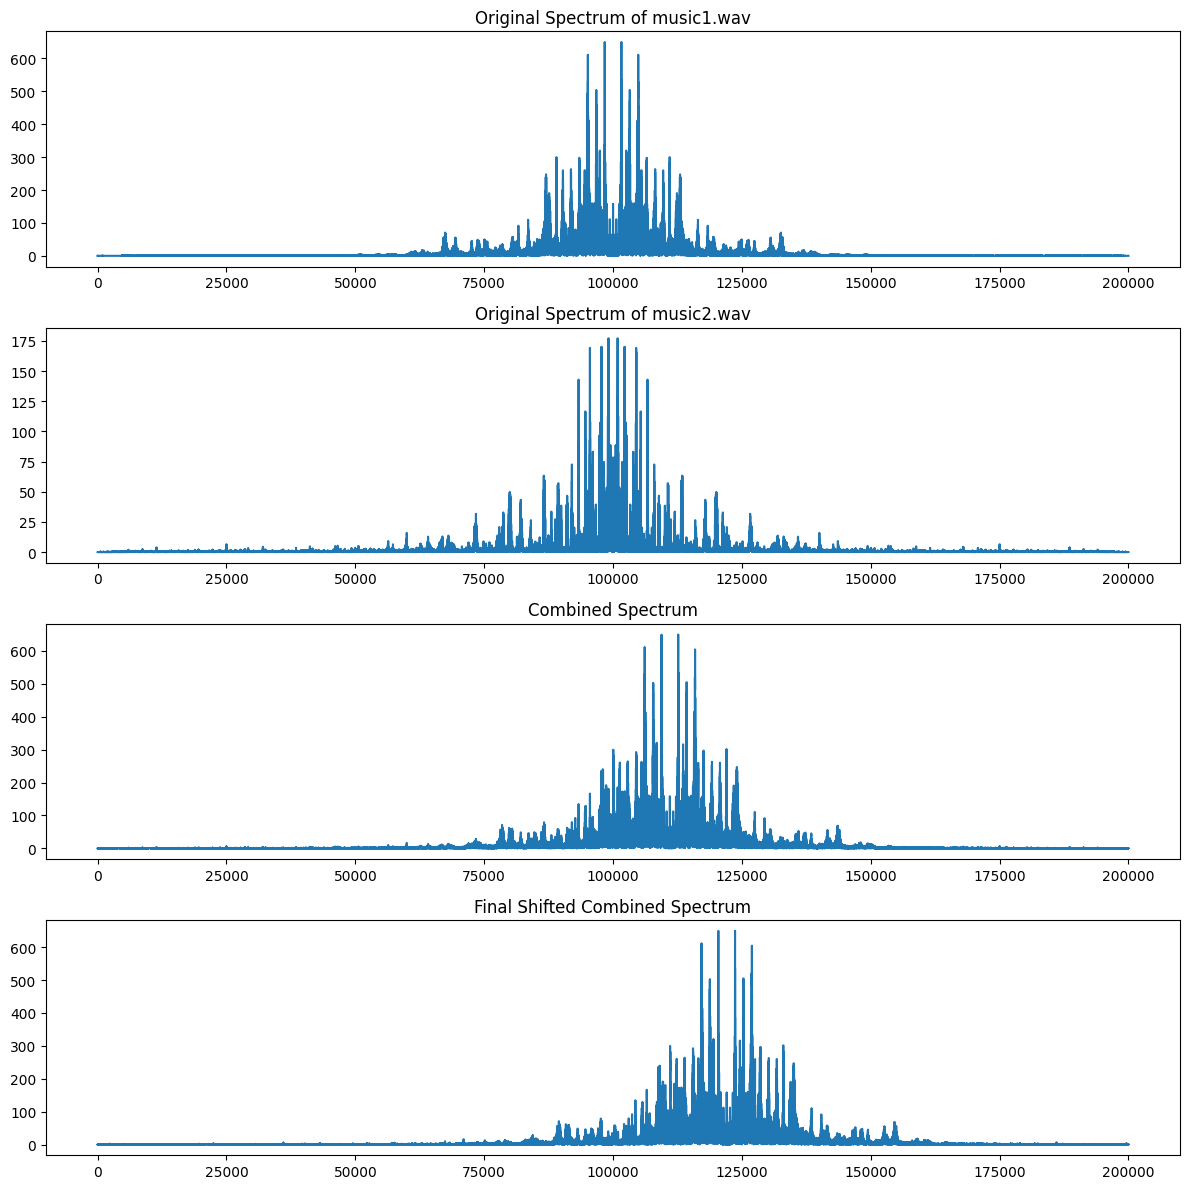

In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.fftpack import fft, ifft, fftshift, ifftshift
import matplotlib.pyplot as plt
import IPython.display as ipd

def read_audio(filename):
    sample_rate, data = wavfile.read(filename)
    if data.dtype == np.int16:
        data = data.astype(np.float32) / 32768.0
    return sample_rate, data

sample_rate1, music1 = read_audio('music1.wav')
sample_rate2, music2 = read_audio('music2.wav')

# Ensure both audio files have the same sampling rate
if sample_rate1 != sample_rate2:
    print("Warning: Sample rates differ. Resampling music2 to match music1.")
    from scipy import signal
    music2 = signal.resample(music2, int(len(music2) * sample_rate1 / sample_rate2))

# Ensure both audio files have the same length
min_length = min(len(music1), len(music2))
music1 = music1[:min_length]
music2 = music2[:min_length]

# Convert to frequency domain
freq_domain1 = fftshift(fft(music1))
freq_domain2 = fftshift(fft(music2))

# Perform initial frequency shift on music1
shift_amount = sample_rate1 //2  # Shift by half the sample rate
n = len(freq_domain1)
shifted_freq_domain1 = np.zeros_like(freq_domain1)
shifted_freq_domain1[shift_amount:] = freq_domain1[:n-shift_amount]
shifted_freq_domain1[:shift_amount] = freq_domain1[n-shift_amount:]

# Add the shifted frequency information of music1 with frequency information of music2
combined_freq_domain = shifted_freq_domain1 + freq_domain2

# Perform second frequency shift on the combined signal
shifted_combined_freq_domain = np.zeros_like(combined_freq_domain)
shifted_combined_freq_domain[shift_amount:] = combined_freq_domain[:n-shift_amount]
shifted_combined_freq_domain[:shift_amount] = combined_freq_domain[n-shift_amount:]

# Convert back to time domain
final_time_domain = np.real(ifft(ifftshift(shifted_combined_freq_domain)))

# Normalize the final signal
final_time_domain = final_time_domain / np.max(np.abs(final_time_domain))

# Play the final signal
print("Playing final shifted combined signal:")
ipd.display(ipd.Audio(final_time_domain, rate=sample_rate1))

# Plot spectra for comparison
plt.figure(figsize=(12, 12))
plt.subplot(4, 1, 1)
plt.plot(np.abs(freq_domain1))
plt.title('Original Spectrum of music1.wav')
plt.subplot(4, 1, 2)
plt.plot(np.abs(freq_domain2))
plt.title('Original Spectrum of music2.wav')
plt.subplot(4, 1, 3)
plt.plot(np.abs(combined_freq_domain))
plt.title('Combined Spectrum')
plt.subplot(4, 1, 4)
plt.plot(np.abs(shifted_combined_freq_domain))
plt.title('Final Shifted Combined Spectrum')
plt.tight_layout()
plt.show()

Which sound will be played:
After this second frequency shift, I primarily hear music1 but it is a bit distorted or unclear.
Explanation of this phenomenon:
a) Initial state:

music1 was frequency-shifted
music2 remained in its original frequency position
Combined signal primarily sounded like music2

b) Second frequency shift:

The entire combined spectrum is shifted again
music2's components, which were in the audible range, are now shifted to higher frequencies
music1's components, which were shifted to higher frequencies, are now shifted back towards the audible range

c) Result:

music1's frequency components are now closer to their original positions (though not exactly the same due to two shifts)
music2's components are now in higher, less audible frequencies

This double shift effectively "undoes" much of the initial shift for music1 while shifting music2 out of the easily audible range.
Important considerations:

The exact clarity of music1 will depend on the precise amount of shifting and any phase distortions introduced
There may be some artifacts or distortions due to the double shifting process
Some of music2 might still be audible as background noise or distortion

In summary, this phenomenon demonstrates how frequency shifting can be used to selectively emphasize or de-emphasize different audio components in a combined signal. It also showcases the reversible nature of certain frequency domain operations, allowing us to partially recover a previously obscured signal.

#Part 2

## part B

In [ ]:
import cmath

def fft(x):
    N = len(x)

    # Base case: if the input has only one element, return it
    if N <= 1:
        return x

    # Recursive case
    # Split the input into even and odd indices
    even = fft(x[0::2])
    odd = fft(x[1::2])

    # Combine the results
    T = [cmath.exp(-2j * cmath.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def generate_signal(N):
    return [cmath.exp(2j * cmath.pi * k / N) for k in range(N)]

N = 16
x = generate_signal(N)
X = fft(x)

print("Input signal:")
print(x)
print("\nFFT result:")
print(X)

Input signal:
[(1+0j), (0.9238795325112867+0.3826834323650898j), (0.7071067811865476+0.7071067811865475j), (0.38268343236508984+0.9238795325112867j), (6.123233995736766e-17+1j), (-0.3826834323650897+0.9238795325112867j), (-0.7071067811865475+0.7071067811865476j), (-0.9238795325112867+0.3826834323650899j), (-1+1.2246467991473532e-16j), (-0.9238795325112868-0.38268343236508967j), (-0.7071067811865477-0.7071067811865475j), (-0.38268343236509034-0.9238795325112865j), (-1.8369701987210297e-16-1j), (0.38268343236509-0.9238795325112866j), (0.7071067811865474-0.7071067811865477j), (0.9238795325112865-0.3826834323650904j)]

FFT result:
[(-8.99620797152345e-16-4.406877377903816e-17j), (16-1.5771969893796585e-15j), (6.652624085152891e-16+8.321236844764102e-17j), (-2.051424657947913e-16-1.699455831017226e-16j), (5.991802860916166e-16-6.546914373228742e-16j), (1.2308547947687476e-15-3.106768992845758e-16j), (6.002270494586352e-16+1.1037724665920948e-15j), (-8.497279155086135e-17+4.1028493158958256e

implementation of the Fast Fourier Transform (FFT), which is an efficient algorithm to compute the Discrete Fourier Transform (DFT). This implementation will be a recursive radix-2 Cooley-Tukey FFT algorithm, which works for input sizes that are powers of 2.

If we wanted to work with arbitrary length, we can use DFT instead like below.

In [ ]:
import cmath
import numpy as np

def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        for n in range(N):
            X[k] += x[n] * cmath.exp(-2j * cmath.pi * k * n / N)

    return X

def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)

    for n in range(N):
        for k in range(N):
            x[n] += X[k] * cmath.exp(2j * cmath.pi * k * n / N)
        x[n] /= N

    return x

def generate_signal(N):
    return [cmath.exp(2j * cmath.pi * k / N) for k in range(N)]

# Test the DFT and IDFT functions
if __name__ == "__main__":
    for N in [10, 15, 20]:
        print(f"\nTesting with N = {N}")
        x = generate_signal(N)

        print("Original signal:")
        print(x)

        X = dft(x)
        print("\nDFT result:")
        print(X)

        x_recovered = idft(X)
        print("\nRecovered signal after IDFT:")
        print(x_recovered)

        # Check if the recovered signal is close to the original
        if np.allclose(x, x_recovered):
            print("\nSuccessfully recovered the original signal!")
        else:
            print("\nWarning: Recovered signal differs from the original.")


Testing with N = 10
Original signal:
[(1+0j), (0.8090169943749475+0.5877852522924731j), (0.30901699437494745+0.9510565162951535j), (-0.30901699437494734+0.9510565162951536j), (-0.8090169943749473+0.5877852522924732j), (-1+1.2246467991473532e-16j), (-0.8090169943749476-0.587785252292473j), (-0.30901699437494756-0.9510565162951535j), (0.30901699437494723-0.9510565162951536j), (0.8090169943749473-0.5877852522924734j)]

DFT result:
[-5.55111512e-16+0.00000000e+00j  1.00000000e+01+0.00000000e+00j
 -6.66133815e-16+8.88178420e-16j -3.88578059e-16-2.22044605e-16j
  3.33066907e-16-3.33066907e-16j -3.33066907e-16-5.55111512e-16j
 -2.22044605e-16-7.23345702e-16j  1.55431223e-15+3.44169138e-15j
  6.66133815e-16-1.33226763e-15j  6.66133815e-15+3.21964677e-15j]

Recovered signal after IDFT:
[ 1.        +4.38368021e-16j  0.80901699+5.87785252e-01j
  0.30901699+9.51056516e-01j -0.30901699+9.51056516e-01j
 -0.80901699+5.87785252e-01j -1.        -6.16003705e-16j
 -0.80901699-5.87785252e-01j -0.30901699

## part C

In [ ]:
import cmath

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [cmath.exp(-2j * cmath.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def ifft(X):
    N = len(X)
    if N <= 1:
        return X
    even = ifft(X[0::2])
    odd = ifft(X[1::2])
    T = [cmath.exp(2j * cmath.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def generate_signal(N):
    return [cmath.exp(2j * cmath.pi * k / N) for k in range(N)]


N = 4
x = generate_signal(N)

print("Original signal:")
print(x)

X = fft(x)
print("\nFFT result:")
print(X)

x_recovered = ifft(X)
x_recovered = [val / N for val in x_recovered]
print("\nRecovered signal after IFFT:")
print(x_recovered)

# Check if the recovered signal is close to the original
if all(abs(a - b) < 1e-10 for a, b in zip(x, x_recovered)):
    print("\nSuccessfully recovered the original signal!")
else:
    print("\nWarning: Recovered signal differs from the original.")

Original signal:
[(1+0j), (6.123233995736766e-17+1j), (-1+1.2246467991473532e-16j), (-1.8369701987210297e-16-1j)]

FFT result:
[(-1.224646799147353e-16+1.2246467991473532e-16j), (4-2.4492935982947064e-16j), (1.224646799147353e-16+1.2246467991473532e-16j), 0j]

Recovered signal after IFFT:
[(1+0j), (6.123233995736767e-17+1j), (-1+1.2246467991473532e-16j), (-1.8369701987210297e-16-1j)]

Successfully recovered the original signal!


## Part D

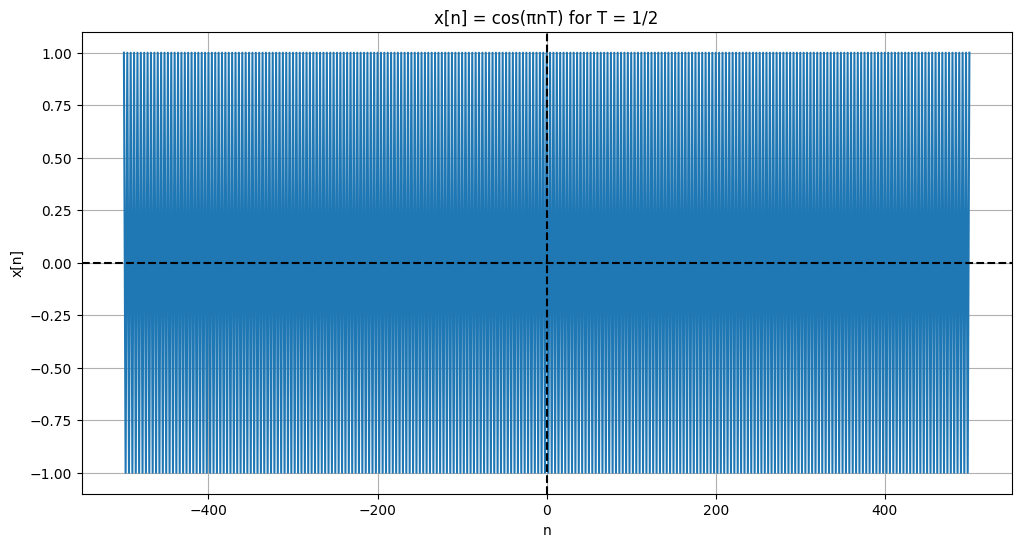

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1/2
N = 1000

# Create the time vector
n = np.arange(-500, 501)
t = n * T

# Create the signal vector
x = np.cos(np.pi * t)

# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(n, x)
plt.title('x[n] = cos(πnT) for T = 1/2')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()


We use plt.scatter() instead of plt.plot(). This will plot each point individually, making the discrete nature of the signal more apparent.

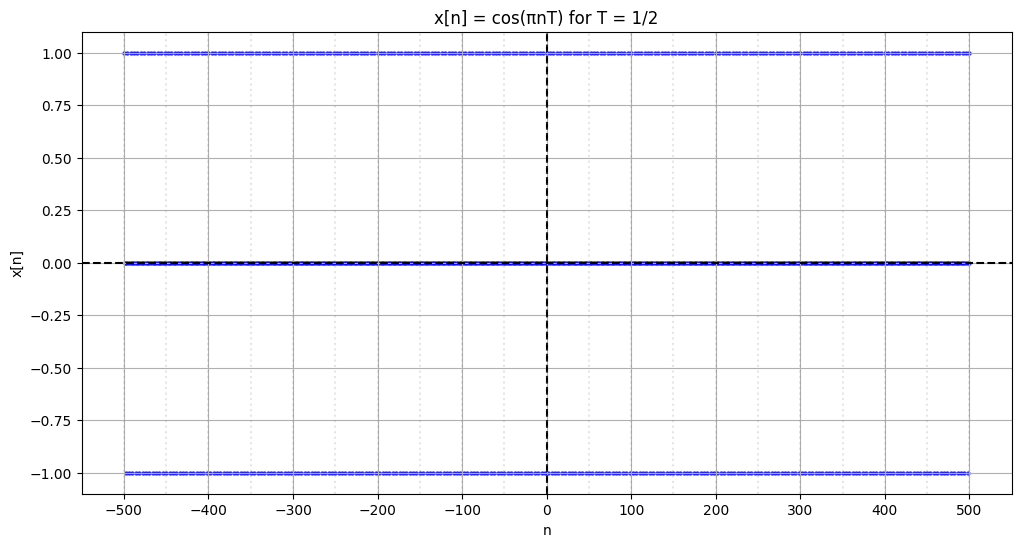

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1/2
N = 1000

# Create the time vector
n = np.arange(-500, 501)
t = n * T

# Create the signal vector
x = np.cos(np.pi * t)

# Plot the signal
plt.figure(figsize=(12, 6))
plt.scatter(n, x, s=5, c='b', alpha=0.7)  # Use scatter plot with small points
plt.title('x[n] = cos(πnT) for T = 1/2')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

plt.xticks(np.arange(-500, 501, 100))

# Add vertical lines to emphasize discreteness
for i in range(-500, 501, 50):
    plt.axvline(x=i, color='gray', alpha=0.2, linestyle=':')

plt.show()

##Part F

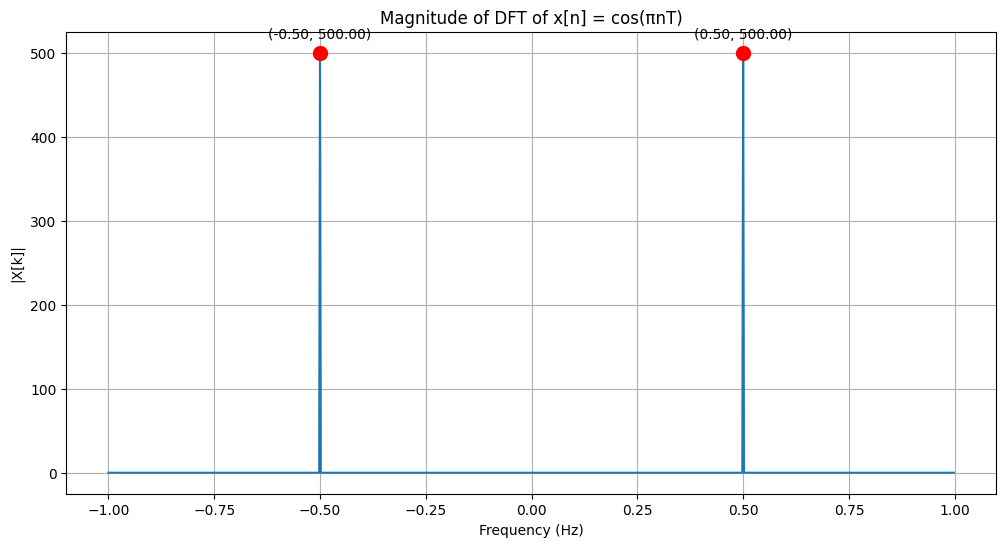

Maximum value of |X[k]|: 500.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 1/2
N = 1000

# Create the time vector
n = np.arange(-500, 500)
t = n * T

# Create the signal vector
x = np.cos(np.pi * t)

# Compute the FFT
X = np.fft.fft(x)

# Shift the zero frequency component to the center
X_shifted = np.fft.fftshift(X)

# Create the frequency vector
freq = np.fft.fftshift(np.fft.fftfreq(N, T))

# Plot the magnitude of the DFT
plt.figure(figsize=(12, 6))
plt.plot(freq, np.abs(X_shifted))
plt.title('Magnitude of DFT of x[n] = cos(πnT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X[k]|')
plt.grid(True)

# Highlight the peaks
peak_indices = np.where(np.abs(X_shifted) > np.max(np.abs(X_shifted))/2)[0]
plt.plot(freq[peak_indices], np.abs(X_shifted[peak_indices]), 'ro', markersize=10)

for idx in peak_indices:
    plt.annotate(f'({freq[idx]:.2f}, {np.abs(X_shifted[idx]):.2f})',
                 (freq[idx], np.abs(X_shifted[idx])),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.show()

# Print the maximum value of |X[k]|
print(f"Maximum value of |X[k]|: {np.max(np.abs(X_shifted)):.2f}")

if we use implemented versions:

Maximum value of |X[k]|: 500.00


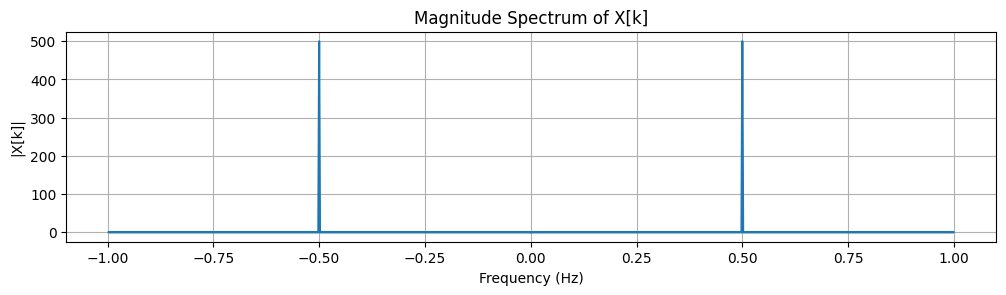

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

def fftfreq(n, d=1.0):
    if n % 2 == 0:
        N = n // 2 + 1
    else:
        N = (n + 1) // 2

    val = 1.0 / (n * d)
    results = np.arange(N, dtype=float)  # Changed to float
    results[1:] *= val
    if n % 2 == 0:
        results = np.concatenate([results, -results[1:-1][::-1]])
    else:
        results = np.concatenate([results, -results[1:][::-1]])

    return results

# Parameters
T = 1/2
N = 1000

# Create the time vector
n = np.arange(N)
t = n * T

# Create the signal vector
x = np.cos(np.pi * t)

# Compute the DFT
X = dft(x)

# Create frequency vector
freq = fftfreq(N, T)

# Compute magnitude and phase
magnitude = np.abs(X)
phase = np.angle(X)

# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freq, magnitude)
plt.title('Magnitude Spectrum of X[k]')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X[k]|')
plt.grid(True)

# Print the maximum value of |X[k]|
print(f"Maximum value of |X[k]|: {np.max(np.abs(X)):.2f}")

## Part G

Is the recovered signal equal to the original? True
Maximum difference: 4.440892098500626e-16


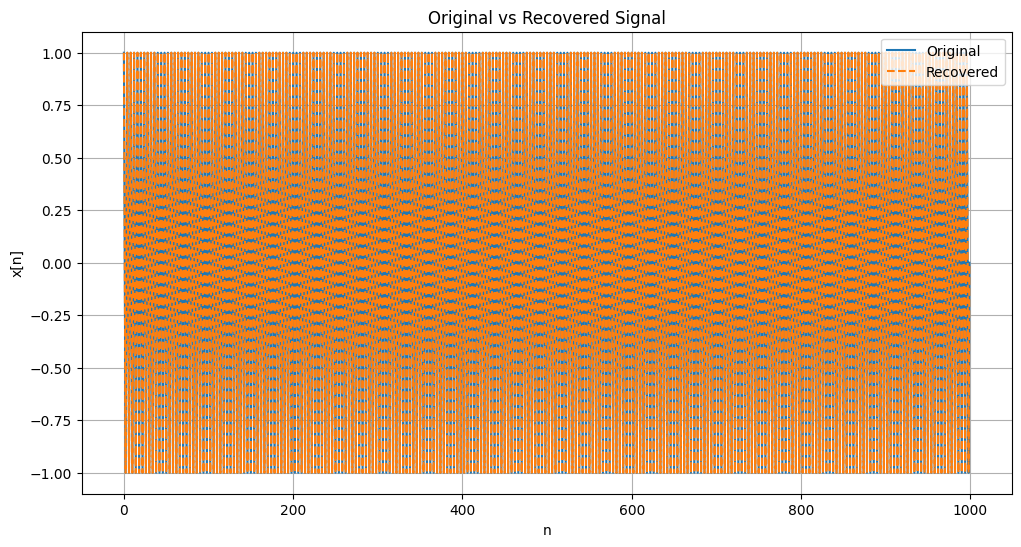

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1/2
N = 1000  # Can be any number

# Create the signal vector
n = np.arange(N)
x = np.cos(np.pi * n * T)

# Compute FFT
X = np.fft.fft(x)

# Compute IFFT
x_recovered = np.fft.ifft(X)

# Check if recovered signal is equal to original
is_equal = np.allclose(x, x_recovered.real, atol=1e-10)

print(f"Is the recovered signal equal to the original? {is_equal}")
print(f"Maximum difference: {np.max(np.abs(x - x_recovered.real))}")

# Plot original and recovered signals
plt.figure(figsize=(12, 6))
plt.plot(n, x, label='Original')
plt.plot(n, x_recovered.real, '--', label='Recovered')
plt.title('Original vs Recovered Signal')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.legend()
plt.grid(True)
plt.show()

if we use the implemented versions:

Is the recovered signal equal to the original? True
Maximum difference: 5.252917743558e-13


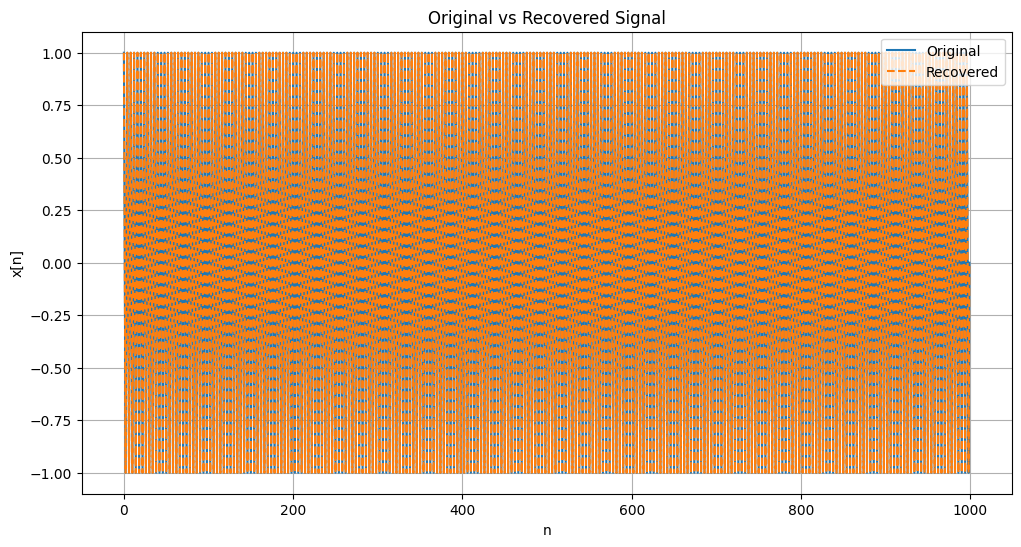

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

def idft(X):
    N = len(X)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    return np.dot(e, X) / N

# Parameters
T = 1/2
N = 1000  # Can be any number

# Create the signal vector
n = np.arange(N)
x = np.cos(np.pi * n * T)

# Compute DFT
X = dft(x)

# Compute IDFT
x_recovered = idft(X)

# Check if recovered signal is equal to original
is_equal = np.allclose(x, x_recovered.real, atol=1e-10)
print(f"Is the recovered signal equal to the original? {is_equal}")
print(f"Maximum difference: {np.max(np.abs(x - x_recovered.real))}")

# Plot original and recovered signals
plt.figure(figsize=(12, 6))
plt.plot(n, x, label='Original')
plt.plot(n, x_recovered.real, '--', label='Recovered')
plt.title('Original vs Recovered Signal')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.legend()
plt.grid(True)
plt.show()

##H

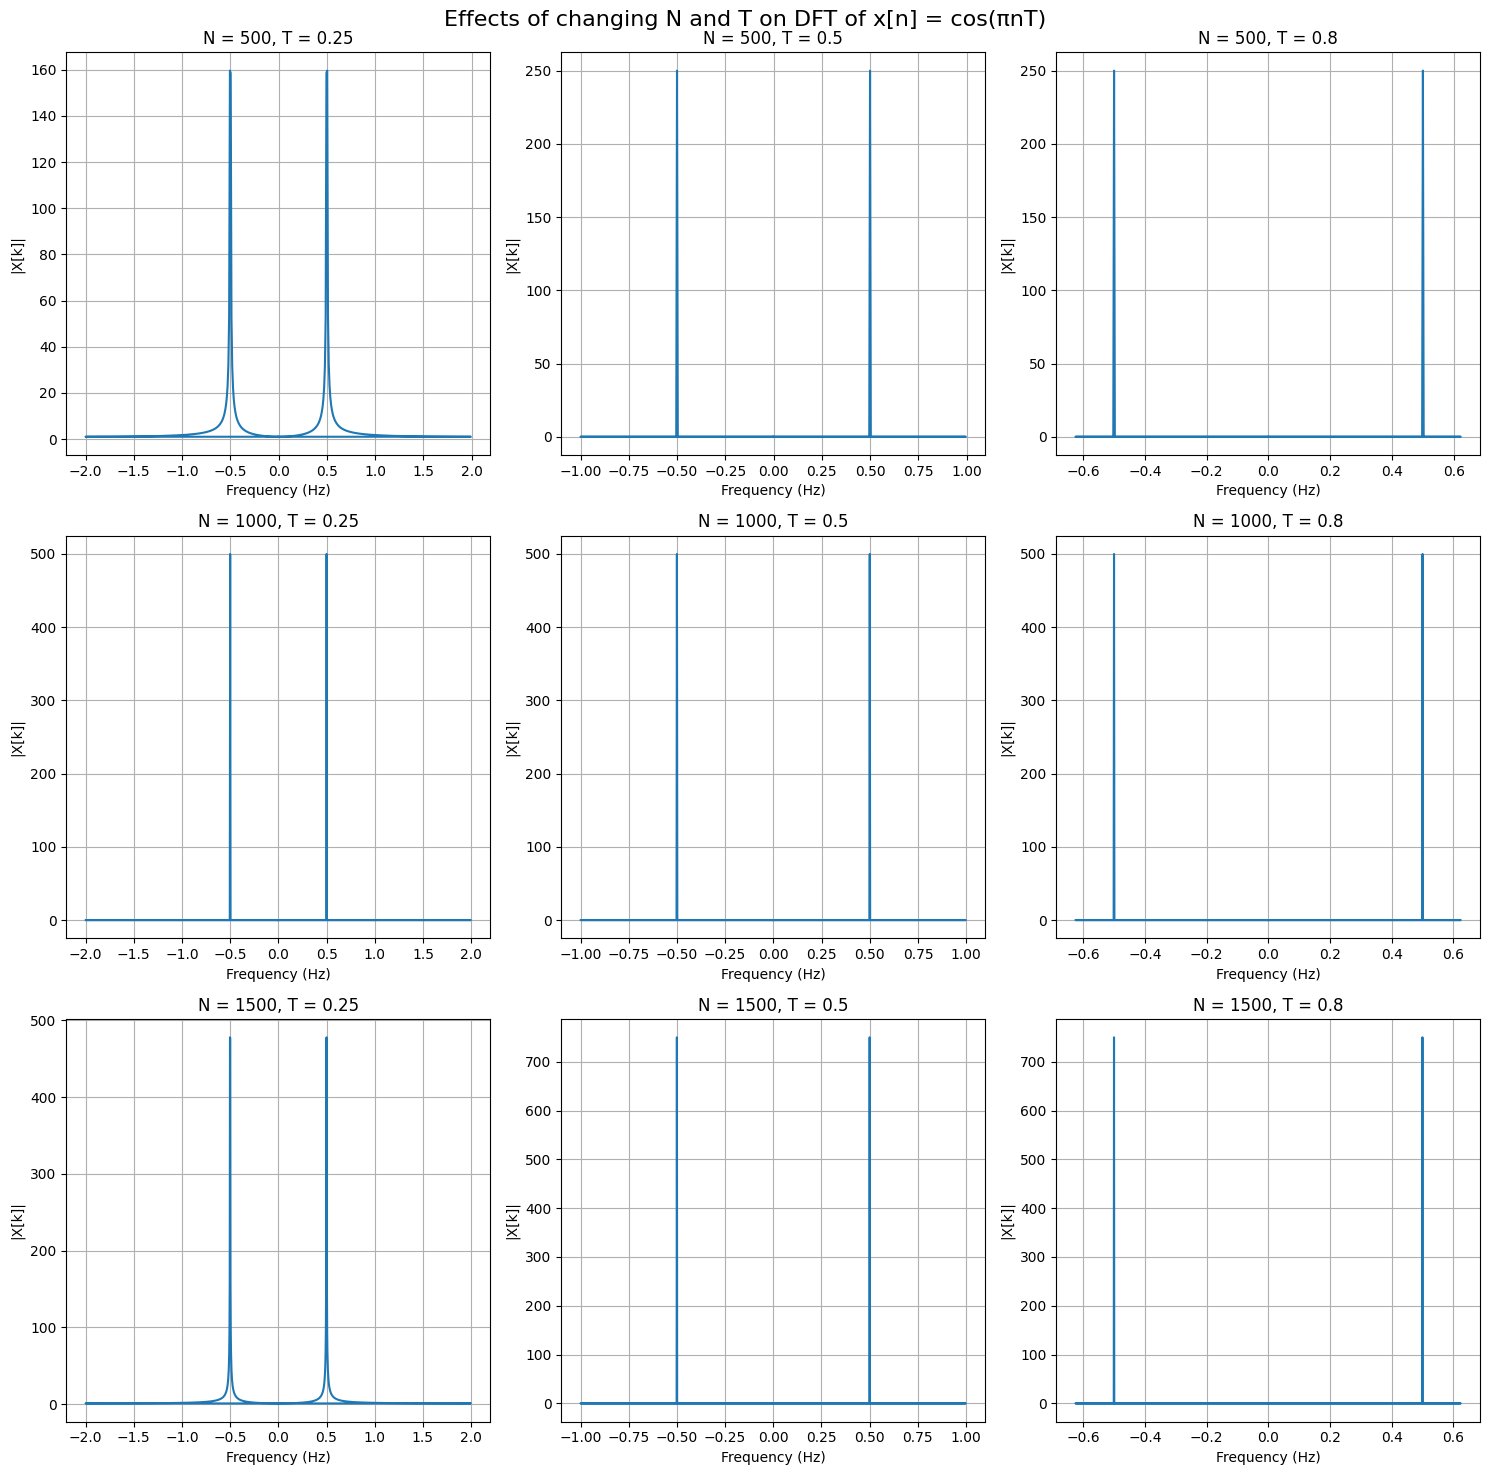

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_and_plot_dft(N, T, ax):
    n = np.arange(N)
    x = np.cos(np.pi * n * T)
    X = np.fft.fft(x)
    freq = np.fft.fftfreq(N, T)

    ax.plot(freq, np.abs(X))
    ax.set_title(f'N = {N}, T = {T}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('|X[k]|')
    ax.grid(True)

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Effects of changing N and T on DFT of x[n] = cos(πnT)', fontsize=16)

# Different values of N and T to test
N_values = [500, 1000, 1500]
T_values = [1/4, 1/2, 0.8]

for i, N in enumerate(N_values):
    for j, T in enumerate(T_values):
        compute_and_plot_dft(N, T, axs[i, j])

plt.tight_layout()
plt.show()

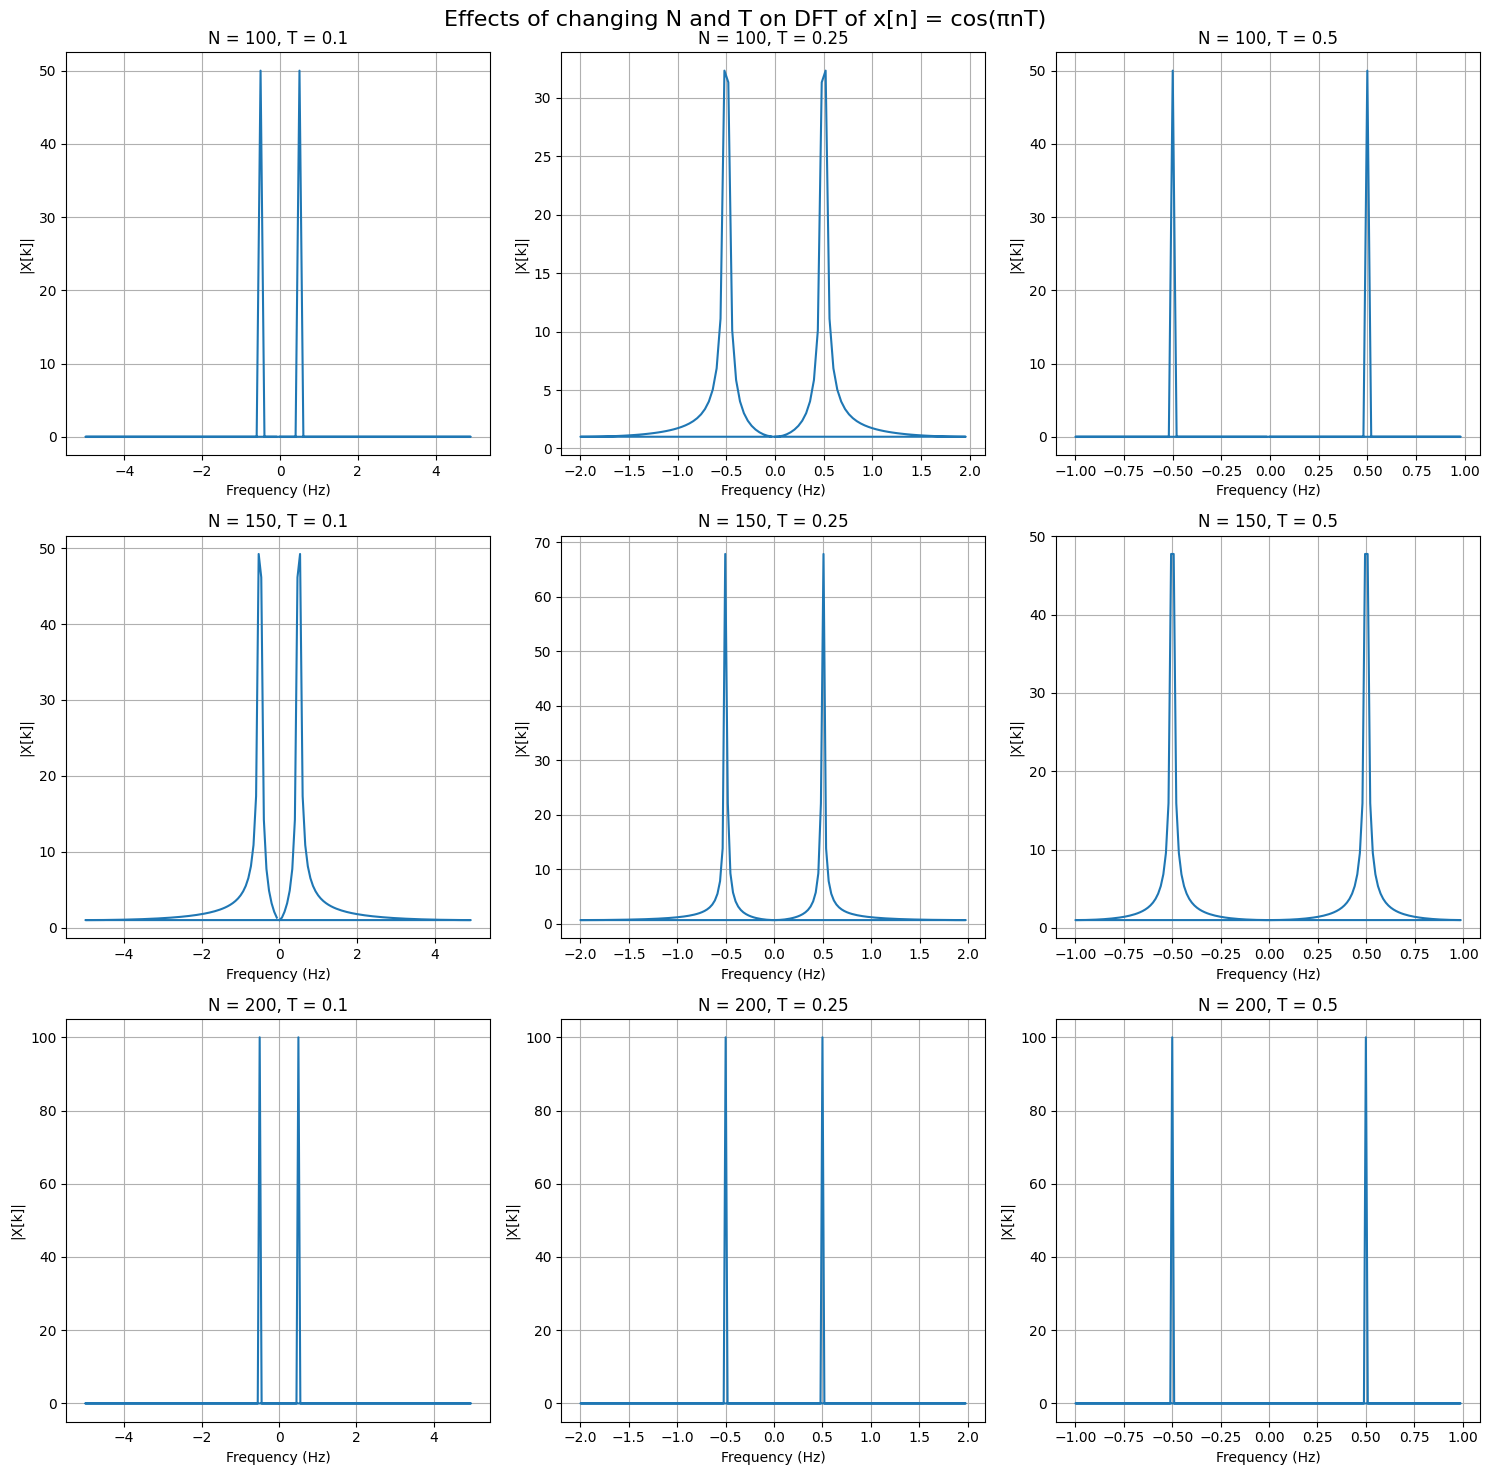

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_and_plot_dft(N, T, ax):
    n = np.arange(N)
    x = np.cos(np.pi * n * T)
    X = np.fft.fft(x)
    freq = np.fft.fftfreq(N, T)

    ax.plot(freq, np.abs(X))
    ax.set_title(f'N = {N}, T = {T}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('|X[k]|')
    ax.grid(True)

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Effects of changing N and T on DFT of x[n] = cos(πnT)', fontsize=16)

# Different values of N and T to test
N_values = [100, 150, 200]
T_values = [1/10, 1/4, 1/2]

for i, N in enumerate(N_values):
    for j, T in enumerate(T_values):
        compute_and_plot_dft(N, T, axs[i, j])

plt.tight_layout()
plt.show()

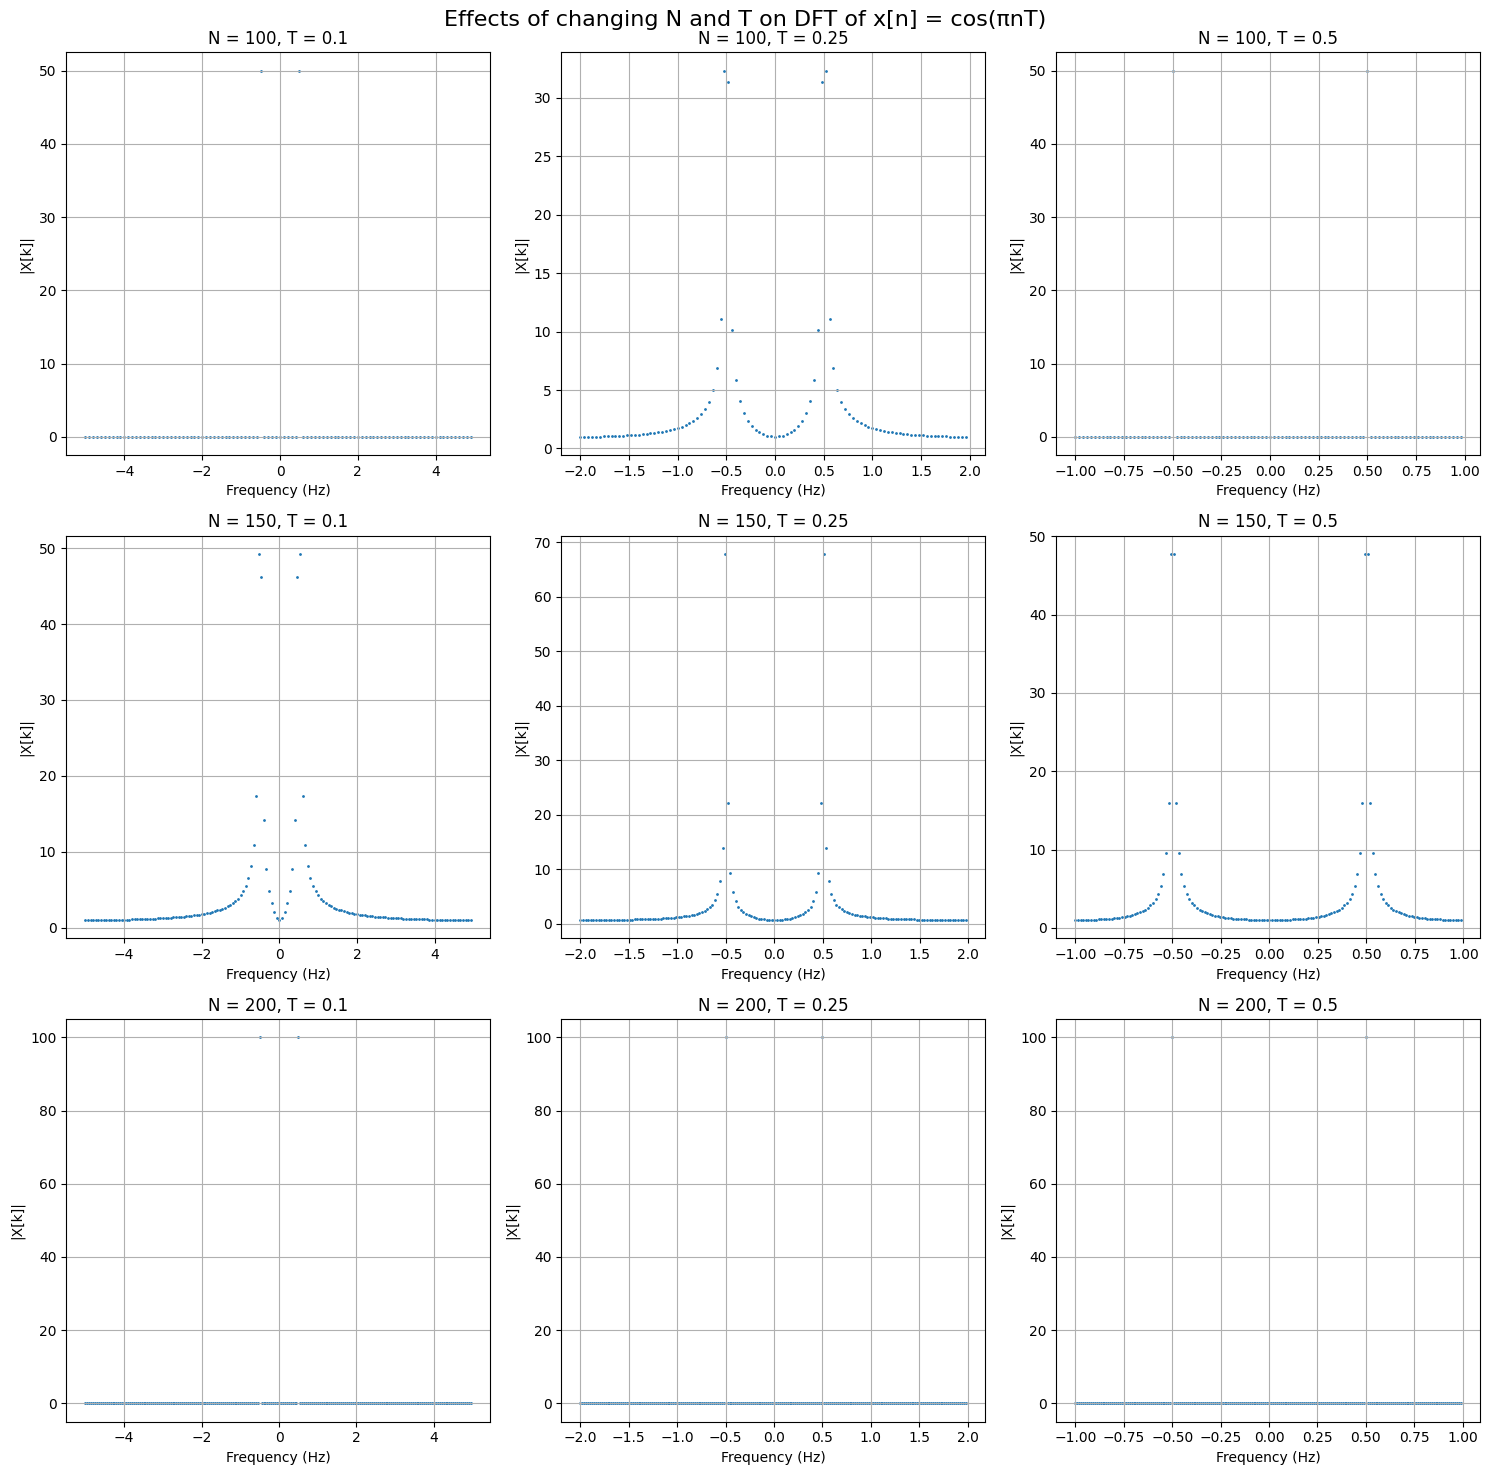

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_and_plot_dft(N, T, ax):
    n = np.arange(N)
    x = np.cos(np.pi * n * T)
    X = np.fft.fft(x)
    freq = np.fft.fftfreq(N, T)

    ax.scatter(freq, np.abs(X), s=1)
    ax.set_title(f'N = {N}, T = {T}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('|X[k]|')
    ax.grid(True)

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Effects of changing N and T on DFT of x[n] = cos(πnT)', fontsize=16)

# Different values of N and T to test
N_values = [100, 150, 200]
T_values = [1/10, 1/4, 0.5]

for i, N in enumerate(N_values):
    for j, T in enumerate(T_values):
        compute_and_plot_dft(N, T, axs[i, j])

plt.tight_layout()
plt.show()

using implemented versions

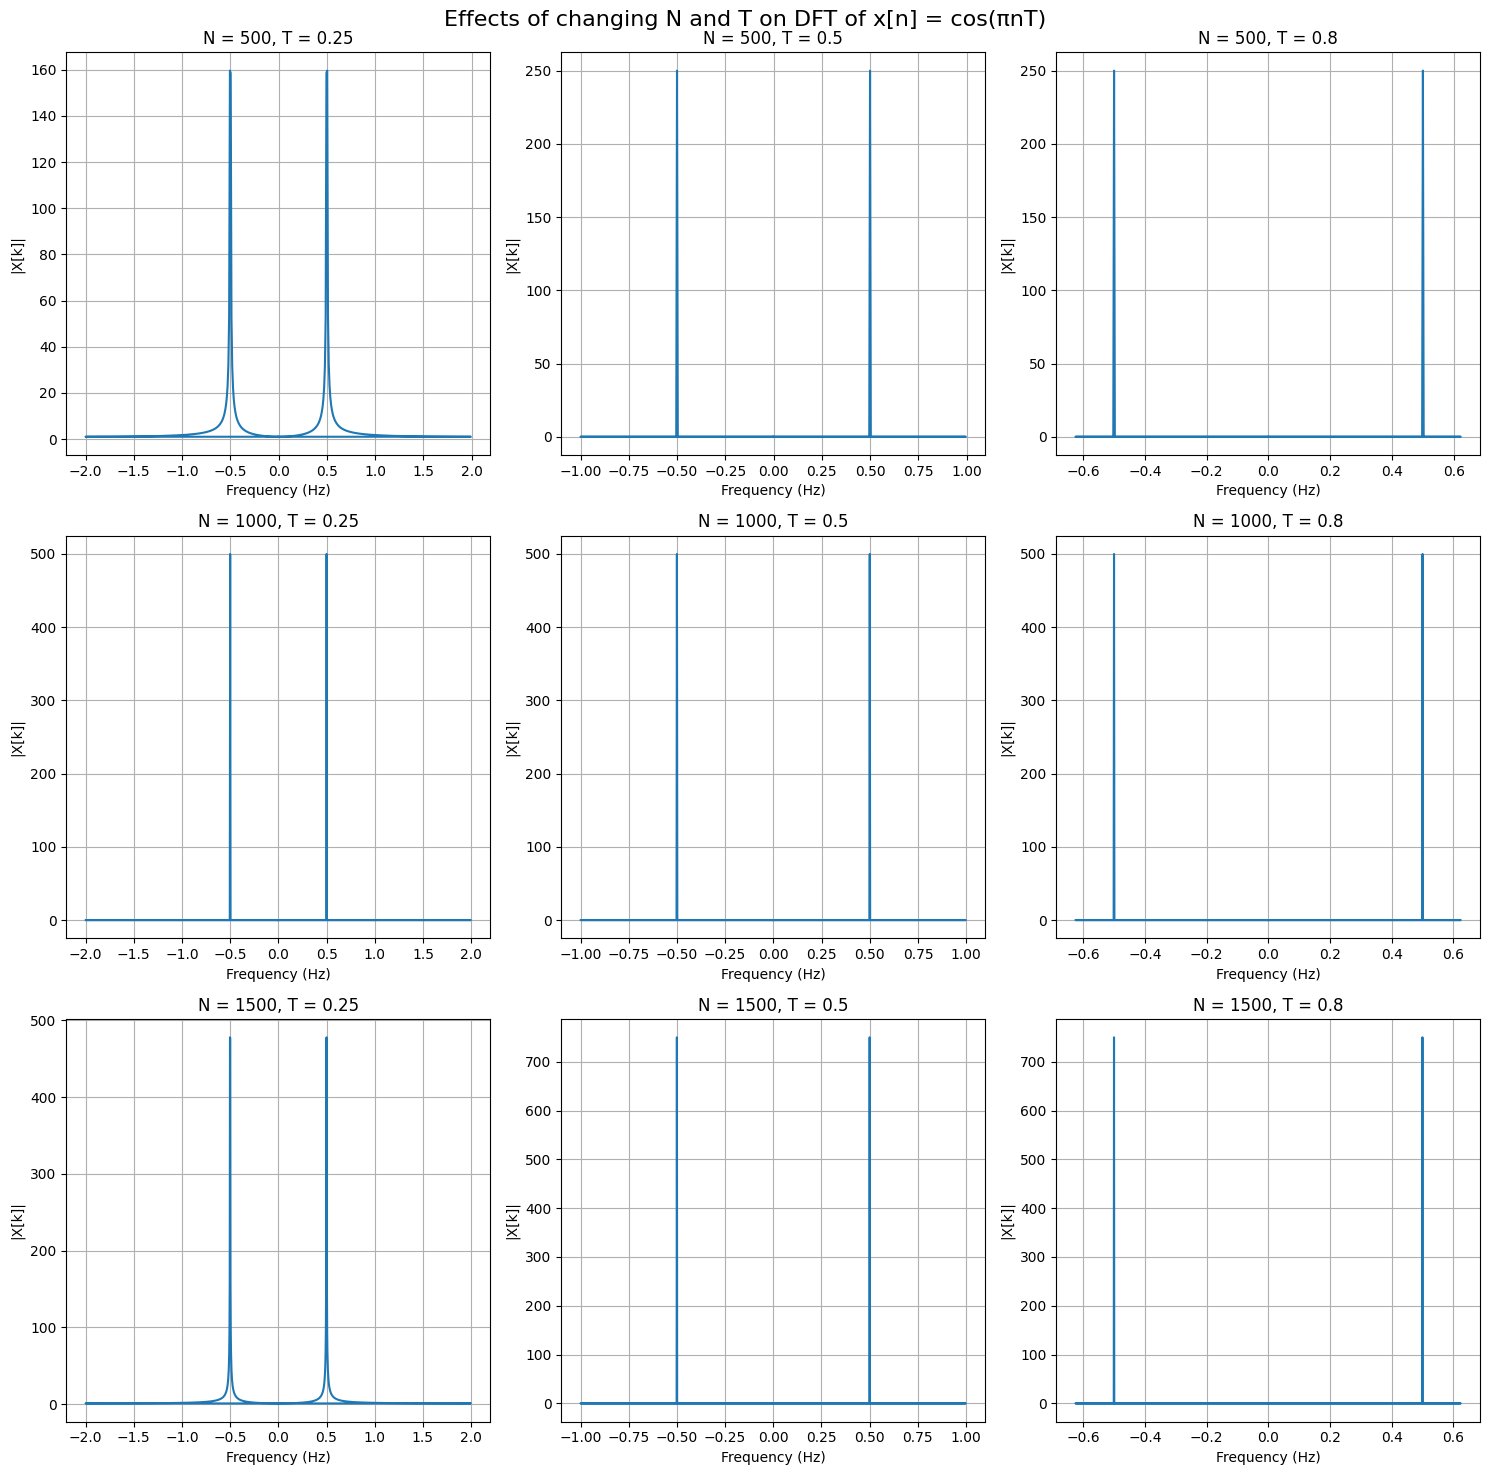

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

def fftfreq(n, d=1.0):
    val = 1.0 / (n * d)
    results = np.empty(n, float)
    N = (n-1) // 2 + 1
    p1 = np.arange(0, N)
    results[:N] = p1
    p2 = np.arange(-(n//2), 0)
    results[N:] = p2
    return results * val

def compute_and_plot_dft(N, T, ax):
    n = np.arange(N)
    x = np.cos(np.pi * n * T)
    X = dft(x)
    freq = fftfreq(N, T)
    ax.plot(freq, np.abs(X))
    ax.set_title(f'N = {N}, T = {T}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('|X[k]|')
    ax.grid(True)

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Effects of changing N and T on DFT of x[n] = cos(πnT)', fontsize=16)

# Different values of N and T to test
N_values = [500, 1000, 1500]
T_values = [1/4, 1/2, 0.8]

for i, N in enumerate(N_values):
    for j, T in enumerate(T_values):
        compute_and_plot_dft(N, T, axs[i, j])

plt.tight_layout()
plt.show()

#Part 3

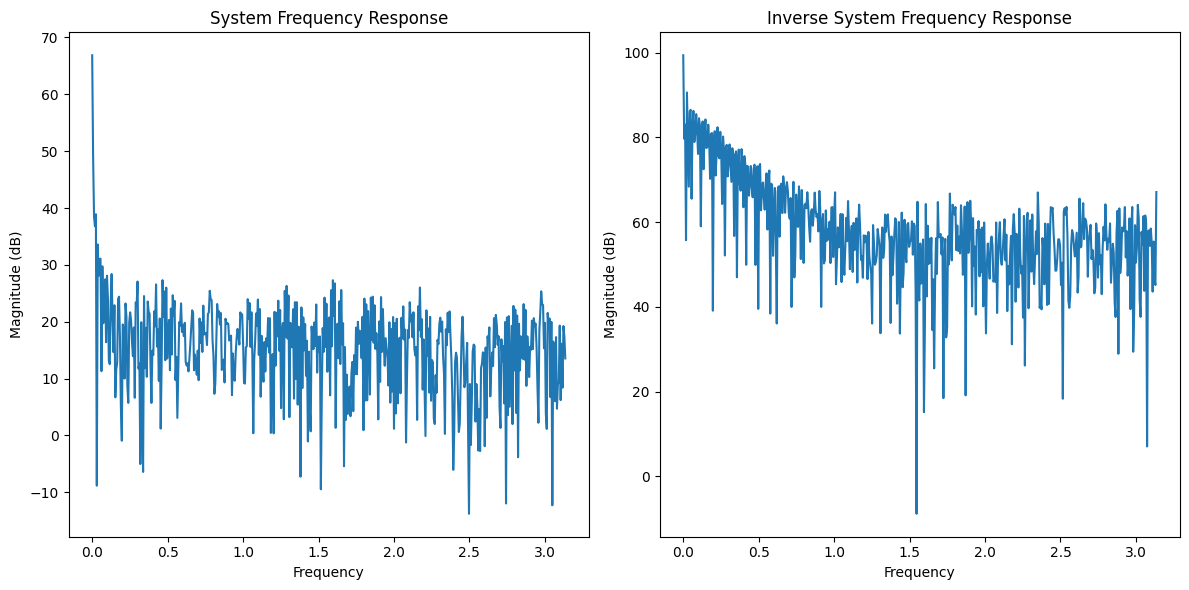

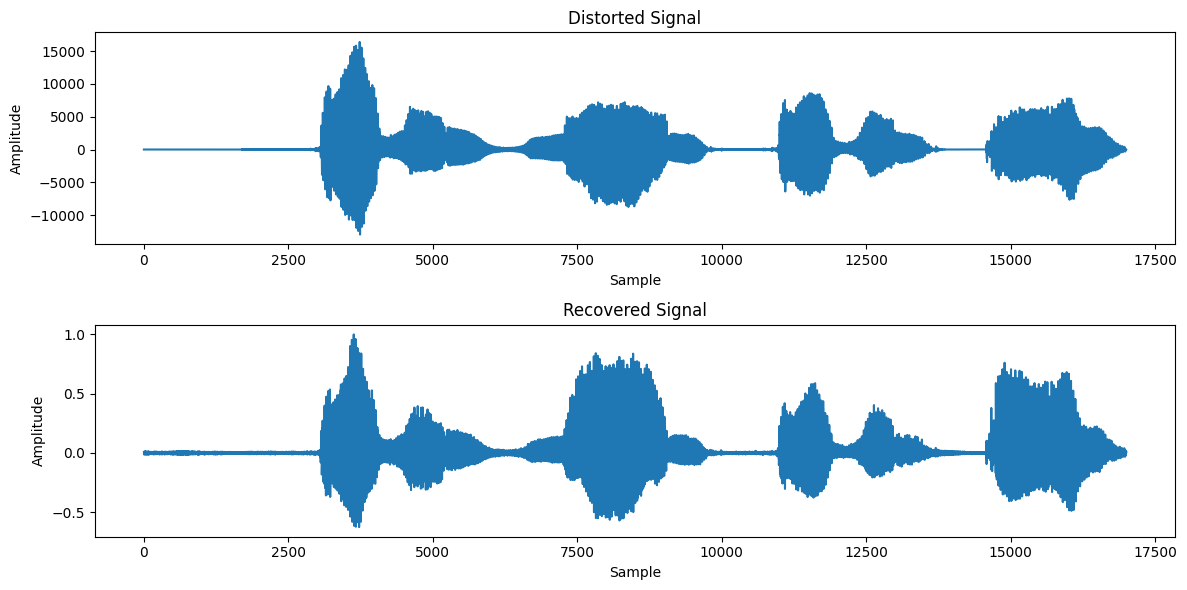

In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import freqz
import matplotlib.pyplot as plt

fs_clean1, clean1 = wavfile.read('clean1.wav')
fs_distorted1, distorted1 = wavfile.read('distorted1.wav')
fs_distorted2, distorted2 = wavfile.read('distorted2.wav')

# Ensure all signals have the same sampling rate
assert fs_clean1 == fs_distorted1 == fs_distorted2, "Sampling rates must be the same for all signals"

# Convert to float for calculations
clean1 = clean1.astype(float)
distorted1 = distorted1.astype(float)
distorted2 = distorted2.astype(float)

# Find the minimum length among all signals
min_length = min(len(clean1), len(distorted1), len(distorted2))

# Trim all signals to the minimum length
clean1 = clean1[:min_length]
distorted1 = distorted1[:min_length]
distorted2 = distorted2[:min_length]

# Calculate frequency response of the system
freq_response = np.fft.fft(distorted1) / np.fft.fft(clean1)

# Calculate inverse frequency response
inv_freq_response = 1 / freq_response

# Recover clean2 signal
recovered2_freq = np.fft.fft(distorted2) * inv_freq_response
recovered2 = np.real(np.fft.ifft(recovered2_freq))

# Normalize recovered signal
recovered2 = recovered2 / np.max(np.abs(recovered2))

wavfile.write('recovered2.wav', fs_clean1, (recovered2 * 32767).astype(np.int16))

w, h = freqz(freq_response)
w_inv, h_inv = freqz(inv_freq_response)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title('System Frequency Response')
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')

plt.subplot(122)
plt.plot(w_inv, 20 * np.log10(np.abs(h_inv)))
plt.title('Inverse System Frequency Response')
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')

plt.tight_layout()
plt.show()

# Plot original and recovered signals

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(distorted2)
plt.title('Distorted Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.plot(recovered2)
plt.title('Recovered Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

 Instead of trimming all signals to the minimum length, we can use zero-padding to ensure all signals have the same length without losing any information

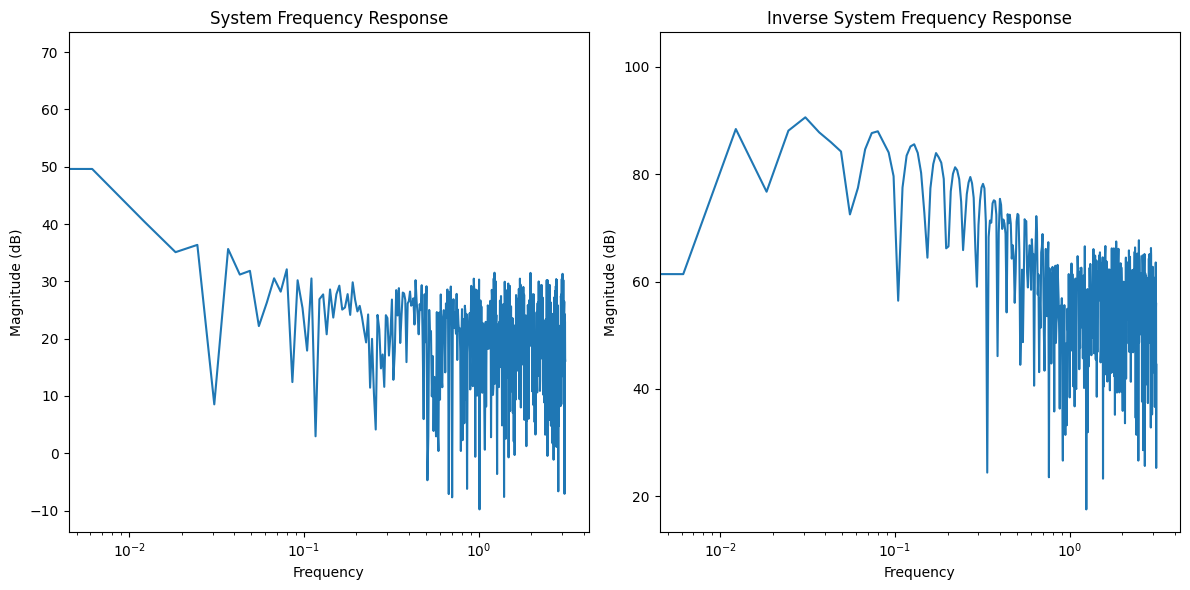

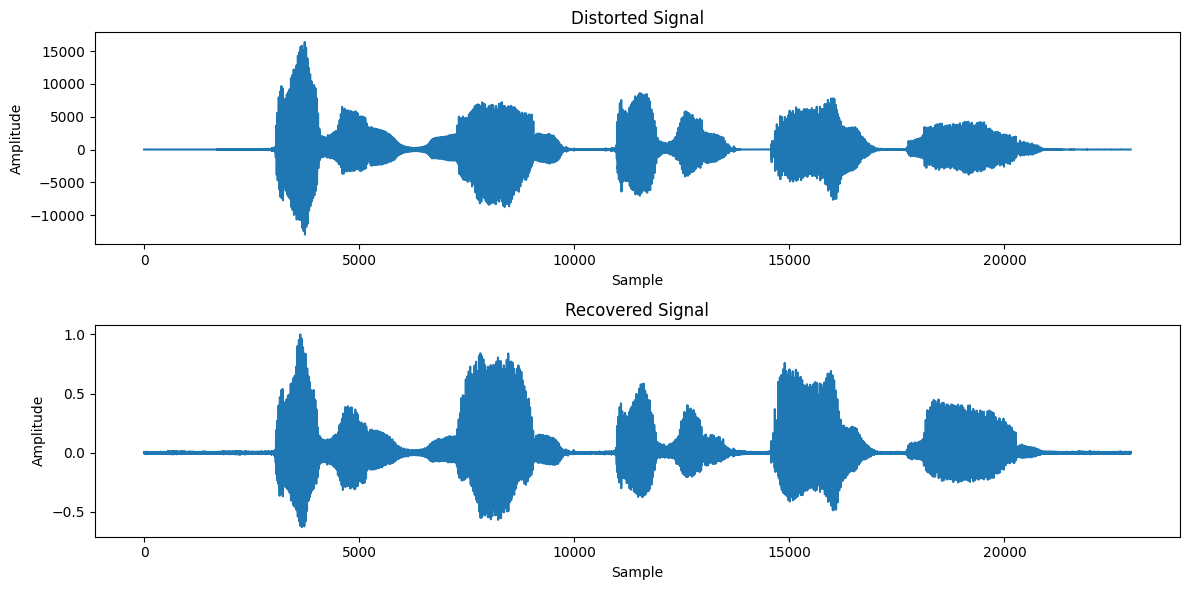

In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import freqz
import matplotlib.pyplot as plt

def read_wav(filename):
    fs, data = wavfile.read(filename)
    return fs, data.astype(float)

def zero_pad(signals):
    max_length = max(len(s) for s in signals)
    return [np.pad(s, (0, max_length - len(s)), 'constant') for s in signals]

fs_clean1, clean1 = read_wav('clean1.wav')
fs_distorted1, distorted1 = read_wav('distorted1.wav')
fs_distorted2, distorted2 = read_wav('distorted2.wav')

# Ensure all signals have the same sampling rate
assert fs_clean1 == fs_distorted1 == fs_distorted2, "Sampling rates must be the same for all signals"

# Zero-pad signals to the same length
clean1, distorted1, distorted2 = zero_pad([clean1, distorted1, distorted2])

# Calculate frequency response of the system
freq_response = np.fft.fft(distorted1) / np.fft.fft(clean1)

# Apply regularization to avoid division by zero
epsilon = 1e-6
inv_freq_response = 1 / (freq_response + epsilon)

# Recover clean2 signal
recovered2_freq = np.fft.fft(distorted2) * inv_freq_response
recovered2 = np.real(np.fft.ifft(recovered2_freq))

# Normalize recovered signal
recovered2 = recovered2 / np.max(np.abs(recovered2))

wavfile.write('recovered2.wav', fs_clean1, (recovered2 * 32767).astype(np.int16))

w, h = freqz(freq_response)
w_inv, h_inv = freqz(inv_freq_response)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.semilogx(w, 20 * np.log10(np.abs(h)))
plt.title('System Frequency Response')
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')

plt.subplot(122)
plt.semilogx(w_inv, 20 * np.log10(np.abs(h_inv)))
plt.title('Inverse System Frequency Response')
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')

plt.tight_layout()
plt.show()

# Plot original and recovered signals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(distorted2)
plt.title('Distorted Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.plot(recovered2)
plt.title('Recovered Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Part 4

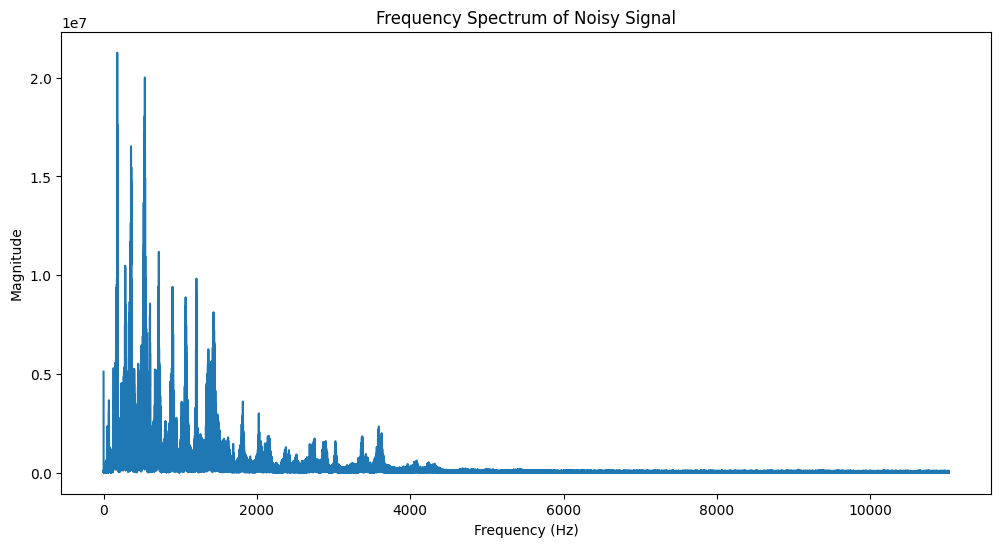

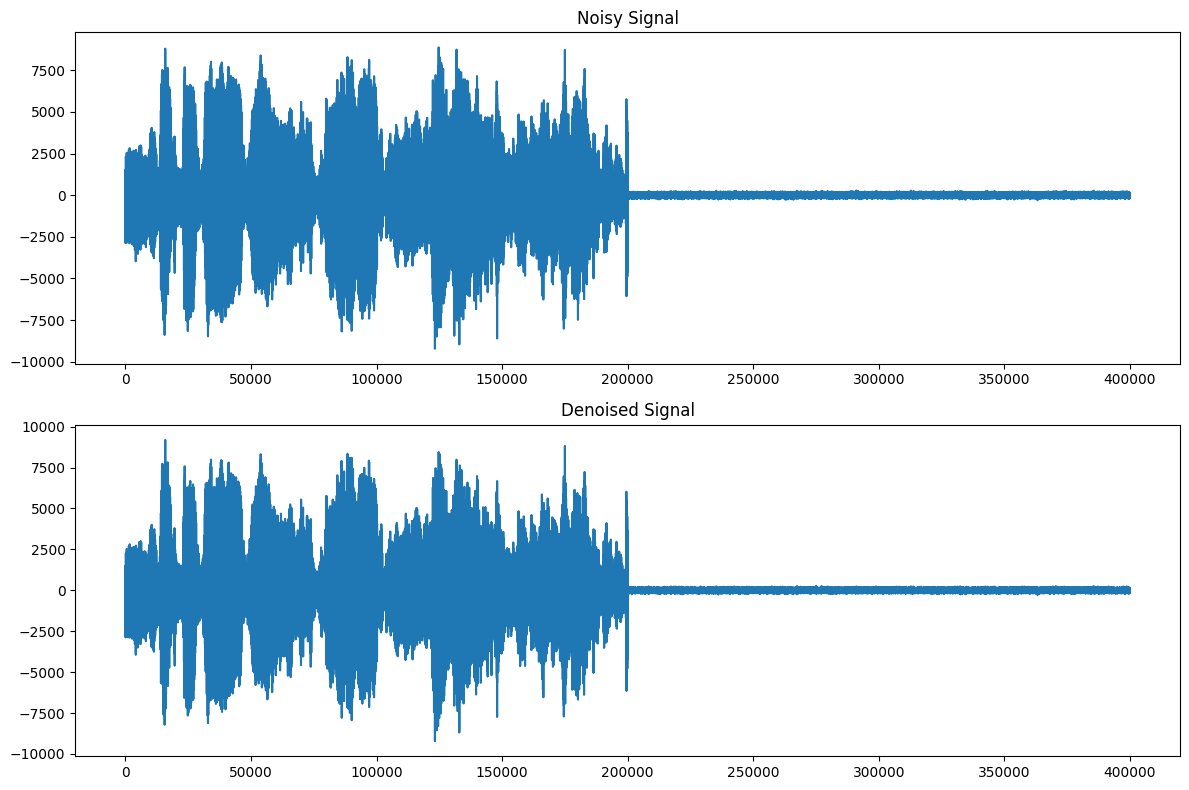

In [ ]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import butter, filtfilt
from scipy import fft
import matplotlib.pyplot as plt

sample_rate, noisy_signal = wav.read('noisy1.wav')

noisy_signal = noisy_signal.astype(float)

# Compute the FFT of the noisy signal
fft_result = fft.fft(noisy_signal)
freqs = fft.fftfreq(len(noisy_signal), 1/sample_rate)

plt.figure(figsize=(12, 6))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_result)[:len(freqs)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Noisy Signal')
plt.show()

def apply_bandstop_filter(signal, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop')
    return filtfilt(b, a, signal)

# Apply the bandstop filter
noise_freq_low = 2000  # Example frequency
noise_freq_high = 3000  # Example frequency

denoised_signal = apply_bandstop_filter(noisy_signal, noise_freq_low, noise_freq_high, sample_rate)

wav.write('denoise1.wav', sample_rate, denoised_signal.astype(np.int16))

# Plot the original and denoised signals
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(noisy_signal)
plt.title('Noisy Signal')
plt.subplot(2, 1, 2)
plt.plot(denoised_signal)
plt.title('Denoised Signal')
plt.tight_layout()
plt.show()

there's significant noise in the higher frequency range, particularly around 3000-4000 Hz. Let's modify the code to target this frequency range for better denoising. Here's the adjusted code:

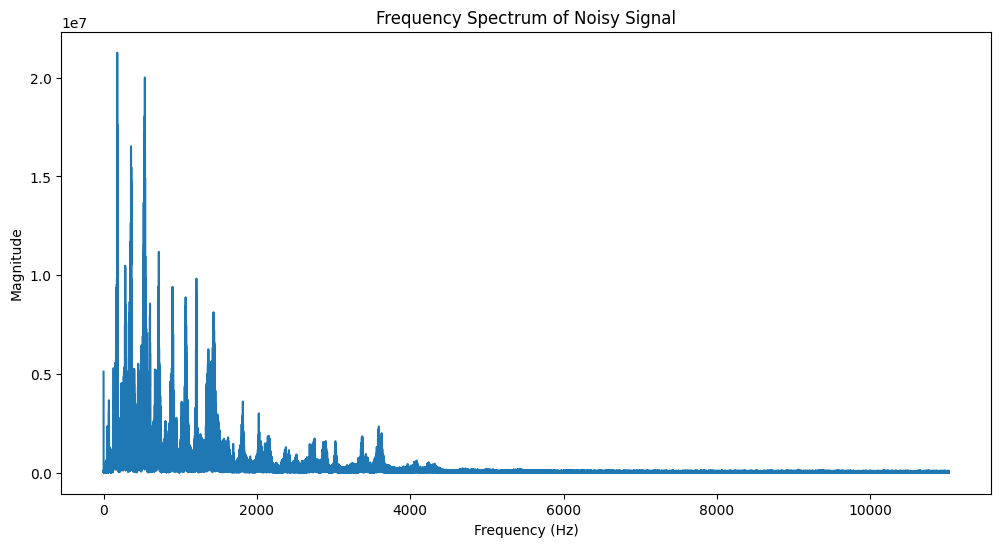

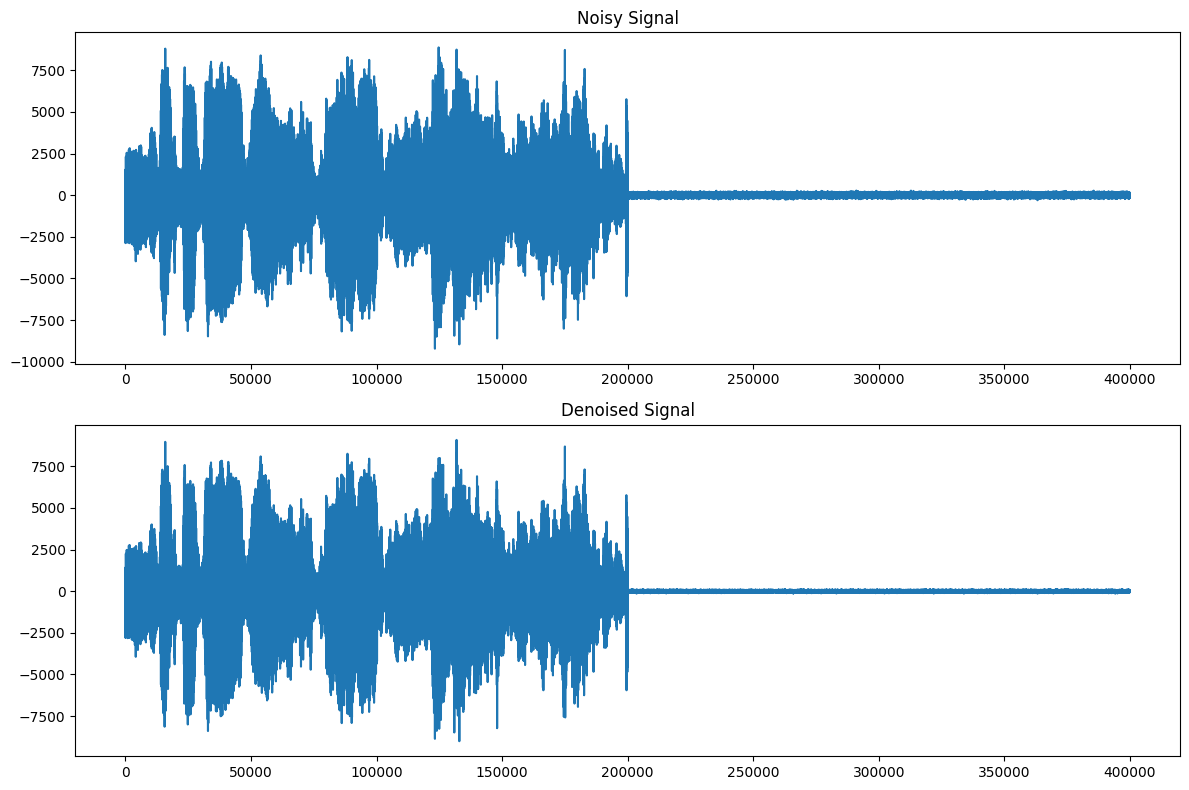

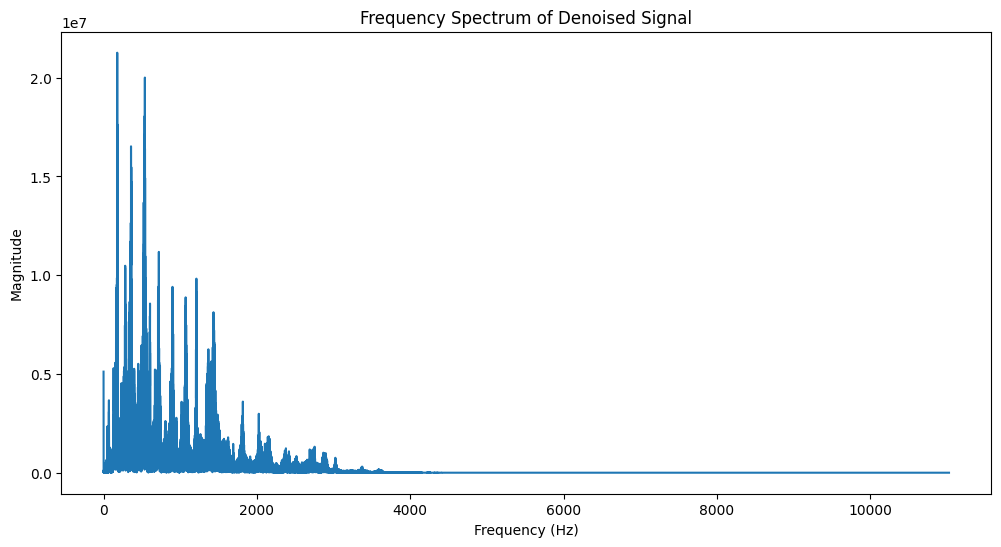

In [ ]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import butter, filtfilt
from scipy import fft
import matplotlib.pyplot as plt

sample_rate, noisy_signal = wav.read('noisy1.wav')

# Convert to float for processing
noisy_signal = noisy_signal.astype(float)

# Compute the FFT of the noisy signal
fft_result = fft.fft(noisy_signal)
freqs = fft.fftfreq(len(noisy_signal), 1/sample_rate)

plt.figure(figsize=(12, 6))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_result)[:len(freqs)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Noisy Signal')
plt.show()

def apply_lowpass_filter(signal, cutoff, fs, order=6):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Apply the lowpass filter
cutoff_freq = 3000  # Cutoff frequency at 3000 Hz

denoised_signal = apply_lowpass_filter(noisy_signal, cutoff_freq, sample_rate)

# Save the denoised signal
wav.write('denoise2.wav', sample_rate, denoised_signal.astype(np.int16))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(noisy_signal)
plt.title('Noisy Signal')
plt.subplot(2, 1, 2)
plt.plot(denoised_signal)
plt.title('Denoised Signal')
plt.tight_layout()
plt.show()

fft_denoised = fft.fft(denoised_signal)
plt.figure(figsize=(12, 6))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_denoised)[:len(freqs)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Denoised Signal')
plt.show()

Key changes:

Instead of a bandstop filter, we're now using a lowpass filter. This is because the noise appears to be predominantly in the higher frequencies.

The cutoff frequency is set to 3000 Hz. This should remove most of the high-frequency noise while preserving the majority of the speech signal.

The filter order has been increased to 6 for a sharper cutoff.




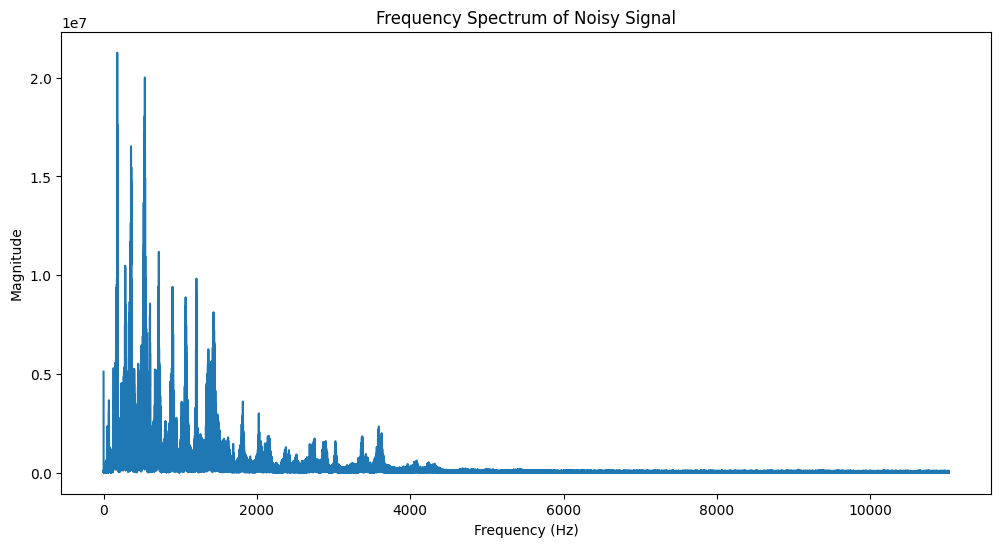

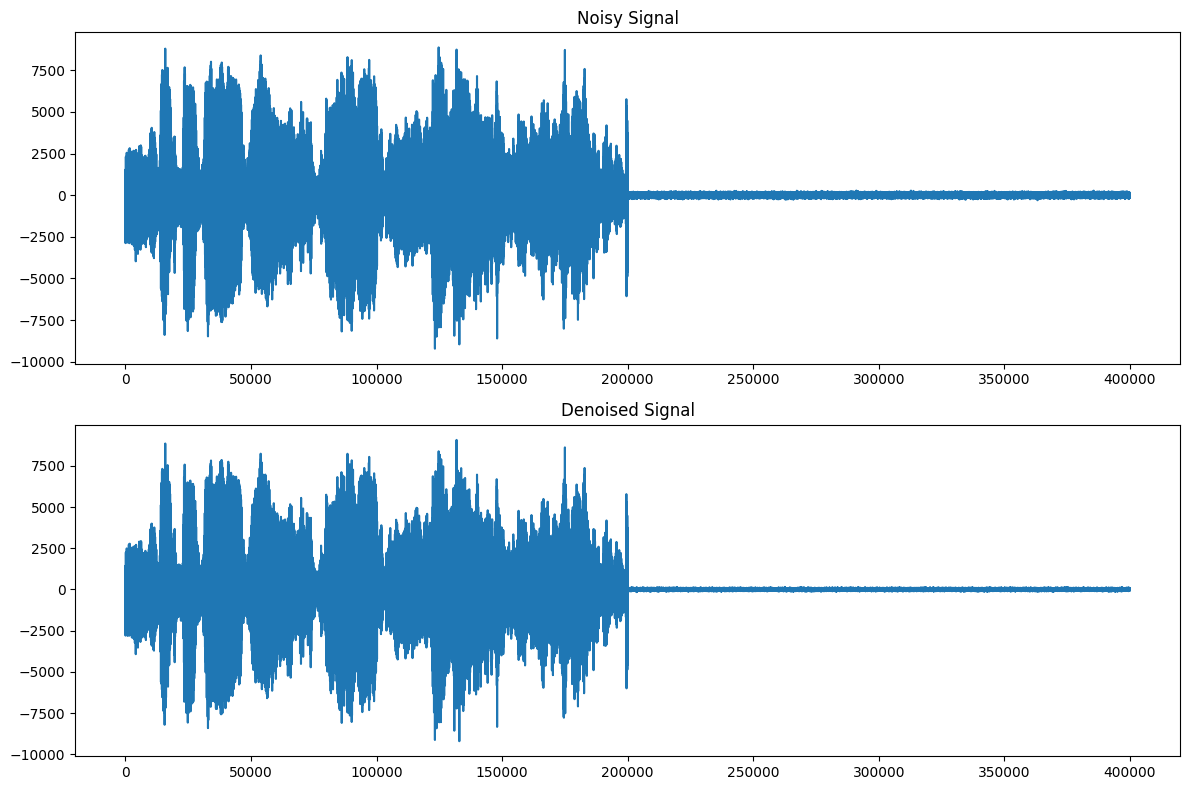

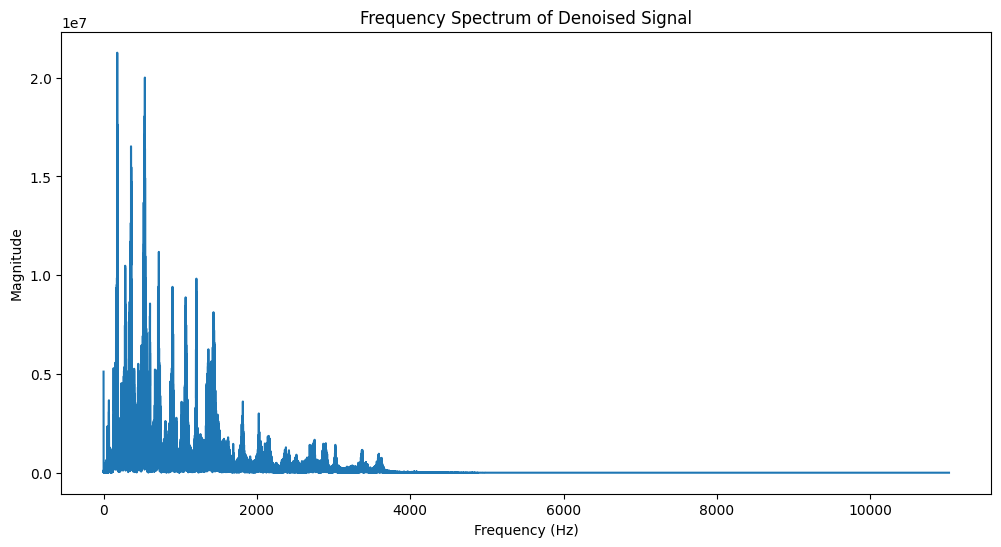

In [ ]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import butter, filtfilt
from scipy import fft
import matplotlib.pyplot as plt

sample_rate, noisy_signal = wav.read('noisy1.wav')

noisy_signal = noisy_signal.astype(float)

# Compute the FFT of the noisy signal
fft_result = fft.fft(noisy_signal)
freqs = fft.fftfreq(len(noisy_signal), 1/sample_rate)

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_result)[:len(freqs)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Noisy Signal')
plt.show()

def apply_lowpass_filter(signal, cutoff, fs, order=6):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Apply the lowpass filter
cutoff_freq = 3500  # Cutoff frequency at 3500 Hz

denoised_signal = apply_lowpass_filter(noisy_signal, cutoff_freq, sample_rate)

wav.write('denoise2.wav', sample_rate, denoised_signal.astype(np.int16))

# Plot the original and denoised signals
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(noisy_signal)
plt.title('Noisy Signal')
plt.subplot(2, 1, 2)
plt.plot(denoised_signal)
plt.title('Denoised Signal')
plt.tight_layout()
plt.show()

# Plot the frequency spectrum of the denoised signal
fft_denoised = fft.fft(denoised_signal)
plt.figure(figsize=(12, 6))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_denoised)[:len(freqs)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of Denoised Signal')
plt.show()